Author: [Chuong Hoa Loc](https://github.com/Locchuong96)
[email](locchuong123@gmail.com)

### RNN application on sequence data

![models](models.png)

(*) is the equation connect from the previous state to current state

**RNN (recurrent neural network)**

![RNN](RNN2.png)

|   |   |   |
|---|---|---|
|$m$| sequence lenght||
|$n$| hidden node||
|$x_{t}$| input vector |`(mx1)`|
|$h_{t}$| hidden layer vector |`(nx1)`|
|$o_{t}$| output vector |`(nx1)`|
|$y_{t}$| output vector |`(nx1)`|
|$b_{h}$| bias vector |`(nx1)`|
|$b_{y}$| bias vector |`(1xn)`|
|$U$| x-matrix |`(n,m)`|
|$W$| h-matrix |`(n,n)`|
|$V$| y-matrix |`(1,n)`|

$h_{t} = tanh{(z_{t})} = tanh{(U.x_{t} + W.h_{t-1} + b_{h})}$ (*)

$o_{t} = y_{t} = sigmoid(V.h_{t}+b_{y})$

**GRU (Gated Recurrent Unit)**

*Note*: in `GRU` memory_state = hidden_state $c_{t} = a_{t} (h_{t})$

![GRU](GRU_1.png)

|   |   |   |
|---|---|---|
|$x_{t}$| input vector ||
|$h_{t}$| hidden layer vector ||
|$b_{u}$| bias vector ||
|$b_{r}$| bias vector ||
|$b_{h}$| bias vector ||
|$W_{u}$| parameter matrix ||
|$W_{r}$| parameter matrix ||
|$W_{h}$| parameter matrix ||

Update gate:

It help to decide which information from the previous time $h_{t-1}$ step can be take forward to the next time step $h_{t}$

$u_{t} = \sigma{(W_{u}.[h_{t-1},x_{t}] + b_{u})}$

Reset gate: 

It help to decide how to add the new information to the memory i.e how much of the past information can be forget
$r_{t} = \sigma{(W_{r}.[h_{t-1},x_{t}] + b_{r})}$

Candidate state: 

candidate state is created to holding the new information

$\tilde{h}_{t} = \tanh{(W_{h}.[r_{t} \odot h_{t-1},x_{t}] + b_{h})}$

Hidden state: $h_{t} = (1-u_{t})\odot h_{t-1}+u_{t}\odot\tilde{h}_{t}$ (*)

Output value: $y_{t}  = V.h_{t} + b_{y}$

**LSTM (Long Short Term memory)**

![LSTM](LSTM_1.png)

|   |   |   |
|---|---|---|
|$x_{t}$| input vector ||
|$h_{t}$| hidden layer vector ||
|$c_{t}$| hidden layer vector ||
|$b_{f}$| bias vector ||
|$b_{i}$| bias vector ||
|$b_{c}$| bias vector ||
|$b_{o}$| bias vector ||
|$W_{f}$| parameter matrix ||
|$W_{i}$| parameter matrix ||
|$W_{c}$| parameter matrix ||
|$W_{o}$| parameter matrix ||


Forget gate: $f_{t} = \sigma{(W_{f}.[h_{t-1},x_{t}] + b_{f})}$

Input gate: $i_{t} = \sigma{(W_{i}.[h_{t-1},x_{t}] + b_{i})}$

Output gate: $o_{t} = \sigma{(W_{o}.[h_{t-1},x_{t}] + b_{o})}$

Candidate call state: $\tilde{C}_{t} = \tanh{(W_{c}.[h_{t-1},x_{t}] + b_{c})} $

New cell state: $C_{t} = f_{t} \odot C_{t-1} + i_{t} \odot \tilde{C}_{t}$ (*)

Hidden state: $h_{t} = o_{t} \odot \tanh{C_{t}}$ 

**Overview**

![rnn_models](rnn_models_1.png)

### build GRU (Gated Recurrent Units) from scratch

Gated Recurrent Unit (GRU) (Cho et al. 2014)

**forward pass**

![gru_forward](gru_forward.png)

Update gate: $u_{t} = \sigma{(W_{u}.[h_{t-1},x_{t}] + b_{u})}$

Relevant gate: $r_{t} = \sigma{(W_{r}.[h_{t-1},x_{t}] + b_{r})}$

Content state: $\tilde{h}_{t} = \tanh{(W_{h}.[r_{t} \odot h_{t-1},x_{t}] + b_{h})}$

Hidden state: $h_{t} = (1-u_{t})\odot h_{t-1}+u_{t}\odot\tilde{h}_{t}$

Output value: $y_{t}  = V.h_{t} + b_{y}$

**loss function**

this demo use *mean square error* to calculate how wrong between your prediction and the ground-truth

$$ L = \sum_{k}^{m}L_{k} = \frac{1}{2m} * \sum_{k}^{m} (y_{k} - \hat{y}_{k})^{2}$$

**backward pass (backpropagation though time)**

![gru_backward](gru_backward.png)

$$ \frac{\partial{h_{t}}}{\partial{h_{t-1}}} \space -> \space \frac{\partial{h_{t+1}}}{\partial{h_{t}}} \space -> \space \frac{\partial{h_{t+2}}}{\partial{h_{t+1}}}$$

We need to find:

$$\frac{\partial{L}}{\partial{U_{u}}}, \frac{\partial{L}}{\partial{W_{u}}}, \frac{\partial{L}}{\partial{b_{u}}}$$

$$\frac{\partial{L}}{\partial{U_{r}}}, \frac{\partial{L}}{\partial{W_{r}}}, \frac{\partial{L}}{\partial{b_{r}}}$$

$$\frac{\partial{L}}{\partial{U_{h}}}, \frac{\partial{L}}{\partial{W_{h}}}, \frac{\partial{L}}{\partial{b_{h}}}$$

$$\frac{\partial{L}}{\partial{V}}, \frac{\partial{L}}{\partial{b_{y}}}$$

then we do `gradient descent`:

$$U_{u} = U_{u} - lr * \frac{\partial{L}}{\partial{U_{u}}}, W_{u} = W_{u} - lr * \frac{\partial{L}}{\partial{W_{u}}}, b_{u} = b_{u} - lr * \frac{\partial{L}}{\partial{b_{u}}}$$

$$U_{r} = U_{r} - lr *  \frac{\partial{L}}{\partial{U_{r}}}, W_{r} = W_{r} - lr * \frac{\partial{L}}{\partial{W_{r}}}, b_{r} = b_{r} - lr * \frac{\partial{L}}{\partial{b_{r}}}$$

$$U_{h} = U_{h} - lr *  \frac{\partial{L}}{\partial{U_{h}}}, W_{h} = W_{h} - lr * \frac{\partial{L}}{\partial{W_{h}}}, b_{h} = b_{h} - lr *  \frac{\partial{L}}{\partial{b_{h}}}$$

$$V = V - lr * \frac{\partial{L}}{\partial{V}},b_{y} = b_{y} - lr * \frac{\partial{L}}{\partial{b_{y}}}$$

Let follow these step:  
`chain rule: [term] -> [implicit and explicit] -> [right shape]` -> `references: [blog] [video] [github]` -> `bptt a part`

$$ (explicit) \space \frac{\partial{L}}{\partial{\hat{y}}} = y - \hat{y} \space [1]$$

Calculate `content state`,`reset state`,`update state` $\frac{\partial{L}}{\partial{\tilde{h_{t}}}} , \frac{\partial{L}}{\partial{r_{t}}} , \frac{\partial{L}}{\partial{u_{t}}}$

$$\frac{\partial{L}}{\partial{\tilde{h_{t}}}} = \frac{\partial{L}}{\partial{h_{t}}} \frac{\partial{h_{t}}}{\partial{\tilde{h_{t}}}} = \frac{\partial{L}}{\partial{h_{t}}}.u_{t} \space [2]$$

$$\frac{\partial{L}}{\partial{r_{t}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{r_{t}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}}.(1-\tilde{h_{t}}^{2})(W_{h}.h_{t-1}) \space [3]$$

$$\frac{\partial{L}}{\partial{u_{t}}} = \frac{\partial{L}}{\partial{h_{t}}}.(-h_{t-1} + \tilde{h_{t}}) \space [4]$$

Calculate $\frac{\partial{L}}{\partial{V}}, \frac{\partial{L}}{\partial{b_{y}}}$

$$\frac{\partial{L}}{\partial{V}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{V}} =  \frac{\partial{L}}{\partial{\hat{y}}}.h_{t}\space [5]$$

$$\frac{\partial{L}}{\partial{b_{y}}} = \frac{\partial{\hat{y}}}{\partial{b_{y}}} =  \frac{\partial{L}}{\partial{\hat{y}}}.1 \space [6]$$

Calculate $\frac{\partial{L}}{\partial{U_{h}}}, \frac{\partial{L}}{\partial{W_{h}}}, \frac{\partial{L}}{\partial{b_{h}}}$

$$\frac{\partial{L}}{\partial{U_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{U_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} .(1- \tilde{h_{t}}^{2}).x_{t} \space [7]$$

$$\frac{\partial{L}}{\partial{W_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{W_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} .(1- \tilde{h_{t}}^{2}).h_{t-1} \space [8]$$

$$\frac{\partial{L}}{\partial{b_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{b_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} .(1- \tilde{h_{t}}^{2}).1 \space [9]$$

Calculate $\frac{\partial{L}}{\partial{U_{u}}}, \frac{\partial{L}}{\partial{W_{u}}}, \frac{\partial{L}}{\partial{b_{u}}}$

$$\frac{\partial{L}}{\partial{U_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}\frac{\partial{u_{t}}}{\partial{U_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}.u_{t}.(1-u_{t}).x_{t} \space [10]$$ 

$$\frac{\partial{L}}{\partial{W_{u}}} = \frac{\partial{L}}{\partial{u_{t}}} \frac{\partial{u_{t}}}{\partial{W_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}.u_{t}.(1-u_{t}).h_{t-1} \space [11]$$ 

$$\frac{\partial{L}}{\partial{b_{u}}} = \frac{\partial{L}}{\partial{u_{t}}} \frac{\partial{u_{t}}}{\partial{b_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}.u_{t}.(1-u_{t}).1 \space [12]$$ 


Calculate $\frac{\partial{L}}{\partial{U_{r}}}, \frac{\partial{L}}{\partial{W_{r}}}, \frac{\partial{L}}{\partial{b_{r}}}$

$$\frac{\partial{L}}{\partial{U_{r}}} = \frac{\partial{L}}{\partial{r_{t}}} \frac{\partial{r_{t}}}{\partial{U_{r}}} = \frac{\partial{L}}{\partial{u_{t}}}.r_{t}.(1-r_{t}).x_{t} \space [13]$$ 

$$\frac{\partial{L}}{\partial{W_{r}}} = \frac{\partial{L}}{\partial{r_{t}}} \frac{\partial{r_{t}}}{\partial{W_{r}}} = \frac{\partial{L}}{\partial{u_{t}}}.r_{t}.(1-r_{t}).h_{t-1} \space [14]$$ 

$$\frac{\partial{L}}{\partial{b_{r}}} = \frac{\partial{L}}{\partial{r_{t}}} \frac{\partial{r_{t}}}{\partial{b_{r}}} = \frac{\partial{L}}{\partial{u_{t}}}.r_{t}.(1-r_{t}).1 \space [15]$$ 

We should define min and max value for updating gradient descent, if you don't your gradients may be exploring or vanishing, and your loss does not reduce anymore

In [47]:
# import the libraries
import tqdm
import math 
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# define activation functions

# sigmoid function get value from 0~1
def sigmoid(x):
    return 1/(1+np.exp(-x))

# tanh function get value from -1~1
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

200


Text(0.5, 1.0, 'sequence data')

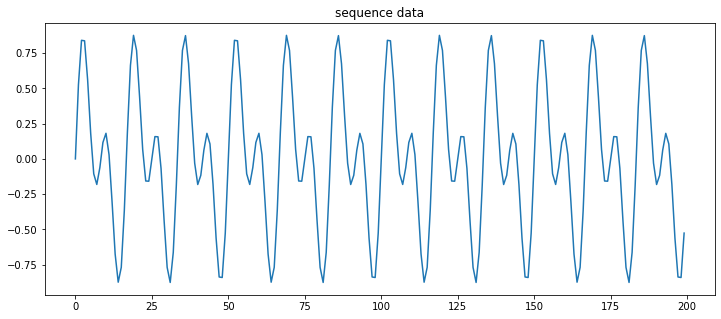

In [49]:
# make dataset
f = 30
seq_data = np.array([(0.5*math.sin(1*f*2*np.pi*x) + 0.5*math.sin(2*f*2*np.pi*x)) for x in np.arange(0,0.4,0.002)]) 
print(len(seq_data))
# visualize the seq_wave
fig = plt.figure(figsize = (12,5))
plt.plot(seq_data)
plt.title('sequence data')

In [50]:
# training dataset
X = []
Y = []
seq_len = 50
num_records = len(seq_data) - seq_len

print(f'seq_len: {seq_len}')
print(f'num_records: {num_records}')

for i in range(num_records):
    X.append(seq_data[i:i+seq_len])
    Y.append(seq_data[i+seq_len])

X = np.array(X)
Y = np.array(Y)
X = np.expand_dims(X,2) # reshape to (training_sample,seq_len,1)
Y = np.expand_dims(Y,1) # (training_sample,1)

print(f'X.shape: {X.shape}')
print(f'Y.shape: {Y.shape}')

seq_len: 50
num_records: 150
X.shape: (150, 50, 1)
Y.shape: (150, 1)


In [51]:
# testing dataset
X_val = []
Y_val = []
seq_len = 50
num_records = len(seq_data) - seq_len

for i in range(num_records-seq_len,num_records):
    X_val.append(seq_data[i:i+seq_len])
    Y_val.append(seq_data[i+seq_len])

X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_val = np.expand_dims(X_val,2) # reshape to (training_sample,seq_len,1)
Y_val = np.expand_dims(Y_val,1) # (training_sample,1)

print(f'X_val.shape: {X_val.shape}')
print(f'Y_val.shape: {Y_val.shape}')

X_val.shape: (50, 50, 1)
Y_val.shape: (50, 1)


How to implement a gru model:
- init all matrix and bias
- build forward pass function
- build calculate loss function
- build backward propagation though time function
- build train function (init-> forward -> backward -> gradient descent -> loop over sample)

In [52]:
# init matrices
hidden_dim = 100
input_dim = 1
output_dim = 1
h_prev = np.zeros((hidden_dim,1))
print(f'hidden_dim: {hidden_dim}')
print(f'h_prev shape: {h_prev.shape}')
print(f'x_t shape: {X[0].shape}')
print(f'y shape: {Y[0].shape}')
# for update gates
U_u = np.random.rand(hidden_dim,seq_len)
W_u = np.random.rand(hidden_dim,hidden_dim)
b_u = np.random.rand(hidden_dim,1)
print(f'U_u shape: {U_u.shape}')
print(f'W_u shape: {W_u.shape}')
print(f'b_u shape: {b_u.shape}')
# for relevant gates
U_r = np.random.rand(hidden_dim,seq_len)
W_r = np.random.rand(hidden_dim,hidden_dim)
b_r = np.random.rand(hidden_dim,1)
print(f'U_r shape: {U_r.shape}')
print(f'W_r shape: {W_r.shape}')
print(f'b_r shape: {b_r.shape}')
# for tilde h
U_h = np.random.rand(hidden_dim,seq_len)
W_h = np.random.rand(hidden_dim,hidden_dim)
b_h = np.random.rand(hidden_dim,1)
print(f'U_h shape: {U_h.shape}')
print(f'W_h shape: {W_h.shape}')
print(f'b_h shape: {b_h.shape}')
# for output value
V = np.random.rand(output_dim,hidden_dim)
b_y = np.random.rand(output_dim,1)
print(f'V shape: {V.shape}')
print(f'b_y shape: {b_y.shape}')    

hidden_dim: 100
h_prev shape: (100, 1)
x_t shape: (50, 1)
y shape: (1,)
U_u shape: (100, 50)
W_u shape: (100, 100)
b_u shape: (100, 1)
U_r shape: (100, 50)
W_r shape: (100, 100)
b_r shape: (100, 1)
U_h shape: (100, 50)
W_h shape: (100, 100)
b_h shape: (100, 1)
V shape: (1, 100)
b_y shape: (1, 1)


In [53]:
def init_matrices(hidden_dim,input_dim,output_dim):
    h_prev = np.zeros((hidden_dim,1))
    # for update gates
    U_u = np.random.rand(hidden_dim,seq_len)
    W_u = np.random.rand(hidden_dim,hidden_dim)
    b_u = np.random.rand(hidden_dim,1)
    # for relevant gates
    U_r = np.random.rand(hidden_dim,seq_len)
    W_r = np.random.rand(hidden_dim,hidden_dim)
    b_r = np.random.rand(hidden_dim,1)
    # for tilde h
    U_h = np.random.rand(hidden_dim,seq_len)
    W_h = np.random.rand(hidden_dim,hidden_dim)
    b_h = np.random.rand(hidden_dim,1)
    # for output value
    V = np.random.rand(output_dim,hidden_dim)
    b_y = np.random.rand(output_dim,1)
    return U_u,W_u,b_u,U_r,W_r,b_r,U_h,W_h,b_h,V,b_y

In [54]:
# forward pass
layers = []
x = X[0]
print(x.shape)
h_prev = np.zeros((hidden_dim,1))
for t in range(seq_len):
    #print(t)
    new_input = np.zeros((seq_len,input_dim))
    new_input[t] = x[t]
    # updated gate
    u_t = sigmoid(U_u @ new_input + W_u @ h_prev + b_u)
    # revelant gate
    r_t = sigmoid(U_r @ new_input + W_r @ h_prev + b_r)
    # tilde h
    h_til = tanh(U_h @ new_input + W_h @ (r_t * h_prev) + b_h)
    # h
    h = (1-u_t)* h_prev + u_t * h_til
    # output value
    y_hat = V@h + b_y
    # collect h_prev,h_til,h,u,r
    layers.append({'h_prev': h_prev,'h_til': h_til,'h':h,'u':u_t,'r':r_t})
    # update h
    prev_h = h

# print out the value
print(y_hat,Y[0])

(50, 1)
[[5.58885821]] [-1.10218212e-15]


In [9]:
# wrap forward pass into a function
def forward_pass(x):
    # forward pass
    layers = []
    x = X[0]
    h_prev = np.zeros((hidden_dim,1))
    for t in range(seq_len):
        #print(t)
        new_input = np.zeros((seq_len,input_dim))
        new_input[t] = x[t]
        # updated gate
        u_t = sigmoid(U_u @ new_input + W_u @ h_prev + b_u)
        # revelant gate
        r_t = sigmoid(U_r @ new_input + W_r @ h_prev + b_r)
        # tilde h
        h_til = tanh(U_h @ new_input + W_h @ (r_t * h_prev) + b_h)
        # h
        h = (1-u_t)* h_prev + u_t * h_til
        # output value
        y_hat = V@h + b_y
        # collect h_prev,h_til,h,u,r
        layers.append({'h_prev': h_prev,'h_til': h_til,'h':h,'u':u_t,'r':r_t})
        # update h
        prev_h = h
    return layers,y_hat

layers,y_hat = forward_pass(x)
# print out the value
print(y_hat,Y[0])

[[6.11262891]] [-1.10218212e-15]


In [55]:
def calc_loss(X,Y):
    loss = 0.0
    n_samples = Y.shape[0] # number of sample
    for i in range(n_samples):
        x,y = X[i],Y[i]
        _,y_hat = layers,y_hat = forward_pass(x)
        loss += (y - y_hat)**2
    loss = 1/(2*n_samples)*np.float(loss)
    return loss

print(f'begin loss {calc_loss(X,Y)}')

begin loss 15.742668070542324


In [56]:
# init matrices
U_u,W_u,b_u,U_r,W_r,b_r,U_h,W_h,b_h,V,b_y = init_matrices(hidden_dim,input_dim,output_dim)

print(f'begin loss {calc_loss(X,Y)}')

begin loss 15.664800974330465


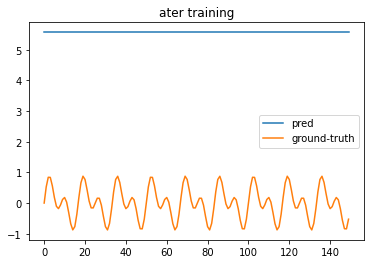

In [57]:
def predict(X):
    preds= []
    n_samples = Y.shape[0] # number of sample
    for i in range(n_samples):
        x,y = X[i],Y[i]
        _,y_hat = layers,y_hat = forward_pass(x)
        preds.append(y_hat)
    # convert to numpy array
    preds = np.array(preds)
    preds = np.squeeze(preds)
    return preds

preds = predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.legend()
plt.title('ater training')
plt.show()

**backpropagation**

In [58]:
# backward though time
dU_u = np.zeros(U_u.shape)
dW_u = np.zeros(W_u.shape)
db_u = np.zeros(b_u.shape)
dU_r = np.zeros(U_r.shape)
dW_r = np.zeros(W_r.shape)
db_r = np.zeros(b_r.shape)
dU_h = np.zeros(U_h.shape)
dW_h = np.zeros(W_h.shape)
db_h = np.zeros(b_h.shape)
dV = np.zeros(V.shape)
db_y = np.zeros(b_y.shape)

print(f'dU_u = U_u shape: {dU_u.shape}')
print(f'dW_u = W_u shape: {dW_u.shape}')
print(f'db_u = b_u shape: {db_u.shape}')

print(f'dU_r = U_r shape: {dU_r.shape}')
print(f'dW_r = W_r shape: {dW_r.shape}')
print(f'db_r = b_r shape: {db_r.shape}')

print(f'dU_h = U_h shape: {dU_h.shape}')
print(f'dW_h = W_h shape: {dW_h.shape}')
print(f'db_h = b_h shape: {db_h.shape}')

print(f'dV = V shape: {dV.shape}')
print(f'db_y = b_y shape: {db_y.shape}')

dU_u = U_u shape: (100, 50)
dW_u = W_u shape: (100, 100)
db_u = b_u shape: (100, 1)
dU_r = U_r shape: (100, 50)
dW_r = W_r shape: (100, 100)
db_r = b_r shape: (100, 1)
dU_h = U_h shape: (100, 50)
dW_h = W_h shape: (100, 100)
db_h = b_h shape: (100, 1)
dV = V shape: (1, 100)
db_y = b_y shape: (1, 1)


In [67]:
class GRU():
    def __init__(self,hidden_dim=100,seq_len=50,input_dim = 1,output_dim = 1):
        self.hidden_dim = hidden_dim 
        self.seq_len = seq_len 
        self.input_dim = input_dim 
        self.output_dim = output_dim  
        # for update gates
        self.U_u = np.random.rand(hidden_dim,seq_len)
        self.W_u = np.random.rand(hidden_dim,hidden_dim)
        self.b_u = np.random.rand(hidden_dim,1)
        # for relevant gates
        self.U_r = np.random.rand(hidden_dim,seq_len)
        self.W_r = np.random.rand(hidden_dim,hidden_dim)
        self.b_r = np.random.rand(hidden_dim,1)
        # for current value
        self.U_h = np.random.rand(hidden_dim,seq_len)
        self.W_h = np.random.rand(hidden_dim,hidden_dim)
        self.b_h = np.random.rand(hidden_dim,1)
        # for output dim
        self.V = np.random.rand(output_dim,hidden_dim)
        self.b_y = np.random.rand(output_dim,1)
       
    def forward_pass(self,x):
        layers = [] 
        h_prev = np.zeros((self.hidden_dim,1))
        seq_len = x.shape[0]
        for t in range(seq_len):
            new_input = np.zeros((seq_len,self.input_dim))
            new_input[t] = x[t]
            # updated gate
            u_t = sigmoid(self.U_u @ new_input + self.W_u @ h_prev + self.b_u)
            # revelant gate
            r_t = sigmoid(self.U_r @ new_input + self.W_r @ h_prev + self.b_r)
            # tilde h
            h_til = tanh(self.U_h @ new_input + self.W_h @ (r_t * h_prev) + self.b_h)
            # h
            h = (1-u_t)* h_prev + u_t * h_til
            # output value
            y_hat = self.V@h + self.b_y
            # collect h_prev,h_til,h,u,r
            layers.append({'h_prev': h_prev,'h_til': h_til,'h':h,'u':u_t,'r':r_t})
            # update h
            prev_h = h
        return layers,y_hat
    
    def calc_loss(self,X,Y):
        loss = 0.0
        n_samples = Y.shape[0] # number of sample
        for i in range(n_samples):
        	y = Y[i]
        	_,y_hat = self.forward_pass(X[i])
        	loss += (y - y_hat)**2
        loss = 1/(2*n_samples)*np.float(loss)
        return loss
    
    def predict(self,X):
        preds= []
        n_samples = X.shape[0] # number of sample
        for i in range(n_samples):
            x = X[i]
            _,y_hat = layers,y_hat = self.forward_pass(x)
            preds.append(y_hat)
        # convert to numpy array
        preds = np.array(preds)
        preds = np.squeeze(preds)
        return preds
    
    def bptt(self,x,y,layers,y_hat,min_val = -10,max_val =10):
        T= x.shape[0]
        # init matrices h_til = u_t = r_t = (100,1) = (hidden_dim,1)
        dU_u = np.zeros(self.U_u.shape) # (100,50) = (hidden_dim,seq_len)
        dW_u = np.zeros(self.W_u.shape) # (100,100) = (hidden_dim,hidden_dim)
        db_u = np.zeros(self.b_u.shape) # (100,1) = (hidden_dim,1)
        dU_r = np.zeros(self.U_r.shape) # (100,50) = (hidden_dim,seq_len)
        dW_r = np.zeros(self.W_r.shape) # (100,100) = (hidden_dim,hidden_dim)
        db_r = np.zeros(self.b_r.shape) # (100,1) = (hidden_dim,1)
        dU_h = np.zeros(self.U_h.shape) # (100,50) = (hidden_dim,seq_len)
        dW_h = np.zeros(self.W_h.shape) # (100,100) = (hidden_dim,hidden_dim)
        db_h = np.zeros(self.b_h.shape) # (100,1) = (hidden_dim,1)
        dV = np.zeros(self.V.shape)     # (1,100) = (output_dim,hidden_dim)
        db_y = np.zeros(self.b_y.shape) # (1,1) = (1,output_dim)
        
        # dLdy
        dLdy = y - y_hat # (1,1)
        # dLdh
        dLdh = self.V.T @ dLdy  # (100,1)x(1,1) = (100,1)
        # seq_lenght
        for t in range(T):
            # get current timestep input
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            # dV
            dV += dLdy @ np.transpose(layers[t]['h']) # (1,1)x(1,100) = (1,100)
            # db_y
            db_y += dLdy # (1,1)
            # dLdh_til - content-state
            dLdh_til = dLdh*layers[t]['u'] # (100,1)*(100,1)
            # dLdr - reset gate
            dLdr = (1-layers[t]['h_til']**2)*(self.W_r@layers[t]['h_prev']) # (100,1)*[(100,100)x(100,1)]
            #print(f'dLdr {dLdr.shape}')
            # dLdu - update gate
            dLdu = dLdh*(-layers[t]['h_prev'] + layers[t]['h_til']) # (100,1)
            #print(f'dLdu {dLdu.shape}')
            # dldU_u
            dU_h += dLdh_til @ new_input.T # (100,1)x(1,50)
            # dLdW_u
            dW_h += dLdh_til @ layers[t]['h_prev'].T # (100,1)x(1,100)
            # dLdb_u
            db_h += dLdh_til # (100,1)
            # dldU_u
            dU_u += dLdu * (layers[t]['u']*(1-layers[t]['u']) @ new_input.T) # (100,1)x(1,50)
            # dLdW_u
            dW_u += dLdu * (layers[t]['u']*(1-layers[t]['u']) @ layers[t]['h_prev'].T) # (100,1)x(1,100)
            # dLdb_u
            db_u += dLdu * (layers[t]['u']*(1-layers[t]['u'])) # (100,1)
            # dldU_r
            dU_r += dLdr * (layers[t]['r']*(1-layers[t]['r']) @ new_input.T) # (100,1)x(1,50)
            # dLdW_r
            dW_r += dLdr * (layers[t]['r']*(1-layers[t]['r']) @ layers[t]['h_prev'].T) # (100,1)x(1,100)
            # dLdb_r
            db_r += dLdr * (layers[t]['r']*(1-layers[t]['r'])) # (100,1)
            
            #take care for exploding gradients
            if dV.max() > max_val:
                dV[dV > max_val] = max_val
            if dV.min() < min_val:
                dV[dV < min_val] = min_val

            if db_y.max() > max_val:
                db_y[db_y > max_val] = max_val
            if db_y.min() < min_val:
                db_y[db_y < min_val] = min_val

            if dU_h.max() > max_val:
                dU_h[dU_h > max_val] = max_val
            if dU_h.min() < min_val:
                dU_h[dU_h < min_val] = min_val

            if dW_h.max() > max_val:
                dW_h[dW_h > max_val] = max_val
            if dW_h.min() < min_val:
                dW_h[dW_h < min_val] = min_val

            if db_h.max() > max_val:
                db_h[db_h > max_val] = max_val
            if db_h.min() < min_val:
                db_h[db_h < min_val] = min_val

            if dU_u.max() > max_val:
                dU_u[dU_u > max_val] = max_val
            if dU_u.min() < min_val:
                dU_u[dU_u < min_val] = min_val

            if dW_u.max() > max_val:
                dW_u[dW_u > max_val] = max_val
            if dW_u.min() < min_val:
                dW_u[dW_u < min_val] = min_val

            if db_u.max() > max_val:
                db_u[db_u > max_val] = max_val
            if db_u.min() < min_val:
                db_u[db_u < min_val] = min_val

            if dU_r.max() > max_val:
                dU_r[dU_r > max_val] = max_val
            if dU_r.min() < min_val:
                dU_r[dU_r < min_val] = min_val

            if dW_r.max() > max_val:
                dW_r[dW_r > max_val] = max_val
            if dW_r.min() < min_val:
                dW_r[dW_r < min_val] = min_val

            if db_r.max() > max_val:
                db_r[db_r > max_val] = max_val
            if db_r.min() < min_val:
                db_r[db_r < min_val] = min_val
            
        db_y = db_y/t
        db_h = db_h/t
        db_u = db_u/t
        db_r = db_r/t
        
        return dU_u,dW_u,db_u,dU_r,dW_r,db_r,dU_h,dW_h,db_h,dV,db_y
    
    def train(self,X,Y,epochs,learning_rate,min_val,max_val,predict = True,verbose = True):
        # storge loss
        losses = []
        for epoch in range(epochs):
            
            loss = self.calc_loss(X,Y)
            losses.append(loss)
            title = f'epoch: {epoch} loss: {loss}' 
            if verbose: print(title)
            
            for i in tqdm.tqdm(range(X.shape[0])):
                x = X[i]
                y = Y[i]
                # forward pass
                layers,y_hat = self.forward_pass(x)
                # backward pass
                dU_u,dW_u,db_u,dU_r,dW_r,db_r,dU_h,dW_h,db_h,dV,db_y = self.bptt(x,y,layers,y_hat,min_val = min_val,max_val = max_val)
                # gradient descent
                self.U_u += dU_u*learning_rate
                self.W_u += dW_u*learning_rate
                self.b_u += db_u*learning_rate
                self.U_r += dU_r*learning_rate
                self.W_r += dW_r*learning_rate
                self.b_r += db_r*learning_rate
                self.U_h += dU_h*learning_rate
                self.W_h += dW_h*learning_rate
                self.b_h += db_h*learning_rate
                self.V += dV*learning_rate
                self.b_y += db_y*learning_rate
                
            if predict:
                preds = self.predict(X)
                plt.plot(preds,label = 'pred')
                plt.plot(Y,label = 'ground-truth')
                plt.title(title)
                plt.legend()
                plt.show()
                    
        return losses

layers len 50
y_hat [[6.3939842]]
loss 115.22753992669894


  1%|▏         | 2/150 [00:00<00:10, 14.49it/s]

epoch: 0 loss: 115.22753992669894


  1%|▏         | 2/150 [00:00<00:07, 18.52it/s]

epoch: 1 loss: 0.1734200762974632


  1%|▏         | 2/150 [00:00<00:07, 19.23it/s]

epoch: 2 loss: 0.1634208462556309


  1%|▏         | 2/150 [00:00<00:08, 17.86it/s]

epoch: 3 loss: 0.15728842622744713


  0%|          | 0/150 [00:00<?, ?it/s]

epoch: 4 loss: 0.15151215676662566


  1%|▏         | 2/150 [00:00<00:09, 15.04it/s]

epoch: 5 loss: 0.14606721669928804


100%|██████████| 150/150 [00:09<00:00, 15.05it/s]


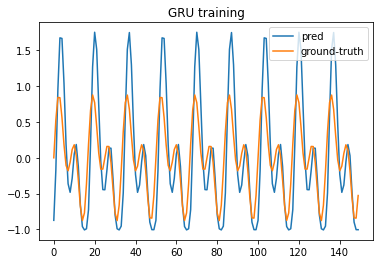

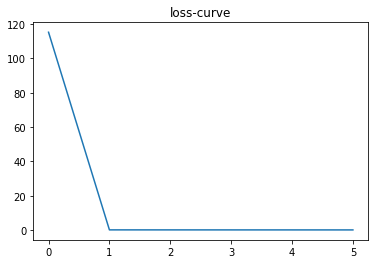

In [69]:
# hyperparameter
epochs = 6
learning_rate = 1e-4
min_val = -200
max_val = 200

node = GRU()

# forward pass
x = X[0]
y = Y[0]
layers,y_hat = node.forward_pass(x)
print(f'layers len {len(layers)}')
print(f'y_hat {y_hat}')

# calculate loss
loss = node.calc_loss(X,Y)
print(f'loss {loss}')

# train
losses = node.train(X,Y,epochs=epochs,learning_rate=1e-4,min_val = min_val,max_val = max_val,predict = False)

# predict
preds = node.predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('GRU training')
plt.legend()

#plt.savefig('predict.png')
plt.figure()
plt.plot(losses,label = 'losses')
plt.title('loss-curve')

plt.show()

Let compare this with the RNN basic model

In [70]:
class RNN():
    def __init__(self,hidden_dim=100,seq_len=50,input_dim = 1,output_dim = 1,seed = 3454):
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.input_dim = input_dim
        self.output_dim  = output_dim
        self.U = np.random.uniform(0,1,(hidden_dim,seq_len)) # (100,50)
        self.W = np.random.uniform(0,1,(hidden_dim,hidden_dim)) # (100,100)
        self.V = np.random.uniform(0,1,(output_dim,hidden_dim)) # (1,100)
        self.bh = np.random.uniform(0,1,(hidden_dim,1))
        self.by = np.random.uniform(0,1,(output_dim,1))
        
    def forward_pass(self,x):
        # init a list of dict to storage
        layers = []
        h_prev = np.zeros((hidden_dim,1))
        for t in range(x.shape[0]):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            z = self.U @ new_input + self.W @ h_prev + self.bh
            h = tanh(z)
            y_hat = V @ h + self.by
            layers.append({'h':h,'h_prev':h_prev})
            h_prev = h
        return layers,y_hat
        
    def calc_loss(self,X,Y):
        loss = 0.0
        m = Y.shape[0]
        for i in range(m):
            x,y = X[i],Y[i]
            _,y_hat = self.forward_pass(x)
            loss += (y-y_hat)**2
        loss = 1/(2*m) * np.float(loss)
        return loss

    def predict(self,X):
        preds = []
        m = X.shape[0] # number of samples
        for i in range(m):
            x = X[i]
            _,y_hat = self.forward_pass(x)
            preds.append(y_hat)
        # convert to numpy array
        preds = np.array(preds)
        preds = np.squeeze(preds)
        return preds
    
    def calc_prev_d(self,h,d,W):
        '''
        Calculate the next previous term d after the first term, this function support for bptt function
        Ex: d2 = d3*W*(1-h**2)
        '''
        d_sum = (1-h**2)*d
        return W.T @ d_sum
    
    def bptt(self,x,y,layers,y_hat,bptt_truncate,min_val=-10,max_val=10):
        # differentials at current prediction
        dW = np.zeros(self.W.shape)
        dU = np.zeros(self.U.shape)
        dV = np.zeros(self.V.shape)
        db_h = np.zeros(self.bh.shape)
        db_y = np.zeros(self.by.shape)
        # differentials each timestep
        dW_t = np.zeros(self.W.shape)
        dU_t = np.zeros(self.U.shape)
        dV_t = np.zeros(self.V.shape)
        # differentials each backpropagation truncate
        dW_i = np.zeros(self.W.shape)
        dU_i = np.zeros(self.U.shape)
        dV_i = np.zeros(self.V.shape)
        # dLdy
        dLdy = y - y_hat
        # dLdh
        dLdh = self.V.T @ dLdy
        # dLdby
        db_y = dLdy
        for t in range(x.shape[0]):
            # dLdV
            dV_t = dLdy @ np.transpose(layers[t]['h'])
            # first term d = (y-y_hat)V
            d_t = dLdh * (1 - layers[t]['h']**2)
            # dLdbh
            db_h += d_t
            for _ in range(t,max(-1,bptt_truncate-1),-1):
                new_input = np.zeros(x.shape)
                new_input[_] = x[_]
                dU_i = d_t @ new_input.T
                dW_i = d_t @ layers[_]['h_prev'].T
                dU_t += dU_i
                dW_t += dW_i
                # update term d
                d_t = self.calc_prev_d(layers[_]['h_prev'],d_t,self.W)
            dV += dV_t
            dU += dU_t
            dW += dW_t
            # take care of possible exploding gradients
            if dU.max() > max_val:
                dU[dU > max_val] = max_val
            if dV.max() > max_val:
                dV[dV > max_val] = max_val
            if dW.max() > max_val:
                dW[dW > max_val] = max_val

            if dU.min() < min_val:
                dU[dU < min_val] = min_val
            if dV.min() < min_val:
                dV[dV < min_val] = min_val
            if dW.min() < min_val:
                dW[dW < min_val] = min_val
        return dU,dV,dW,db_h,db_y
            
    def train(self,X,Y,epochs,learning_rate,bptt_truncate,min_val,max_val,predict = True,verbose = True):
        # storage lost
        losses = []
        for epoch in range(epochs):
            loss = self.calc_loss(X,Y)
            losses.append(loss)
            title = f'epoch: {epoch} loss: {loss}'
            if verbose: print(title)
            
            for i in tqdm.tqdm(range(X.shape[0])):
                x,y = X[i],Y[i]
                # forward pass
                layers,y_hat = self.forward_pass(x)
                dU,dV,dW,db_h,db_y = self.bptt(x,y,layers,y_hat,bptt_truncate,min_val,max_val)
                # SGD
                self.U += learning_rate * dU
                self.W += learning_rate * dW
                self.V += learning_rate * dV
                self.bh += learning_rate * db_h
                self.by += learning_rate * db_y
                
            if predict:
                preds = self.predict(X)
                plt.plot(preds,label = 'pred')
                plt.plot(Y,label = 'ground-truth')
                plt.title(title)
                plt.legend()
                plt.show()
                    
        return losses

layers len 50
y_hat [[50.07664165]]
loss 1253.9600196878393


  1%|          | 1/150 [00:00<00:16,  9.01it/s]

epoch: 0 loss: 1253.9600196878393


  1%|          | 1/150 [00:00<00:16,  8.77it/s]

epoch: 1 loss: 1216.9016267261638


  1%|          | 1/150 [00:00<00:16,  9.09it/s]

epoch: 2 loss: 1180.9385308681758


  1%|          | 1/150 [00:00<00:16,  9.17it/s]

epoch: 3 loss: 1146.0383595662531


  1%|          | 1/150 [00:00<00:23,  6.37it/s]

epoch: 4 loss: 1112.1696970737453


  1%|          | 1/150 [00:00<00:20,  7.41it/s]

epoch: 5 loss: 1079.3020561658298


  1%|          | 1/150 [00:00<00:15,  9.35it/s]

epoch: 6 loss: 1047.4058506961837


  1%|          | 1/150 [00:00<00:16,  9.26it/s]

epoch: 7 loss: 1016.452368964778


  1%|          | 1/150 [00:00<00:16,  8.85it/s]

epoch: 8 loss: 986.4137478727953


  1%|          | 1/150 [00:00<00:15,  9.35it/s]

epoch: 9 loss: 957.26294784144


  1%|          | 1/150 [00:00<00:16,  9.26it/s]

epoch: 10 loss: 928.9737284720319


  1%|          | 1/150 [00:00<00:16,  9.01it/s]

epoch: 11 loss: 901.520624925499


  1%|          | 1/150 [00:00<00:16,  9.01it/s]

epoch: 12 loss: 874.8789249999865


  1%|          | 1/150 [00:00<00:16,  9.26it/s]

epoch: 13 loss: 849.0246468859707


  1%|          | 1/150 [00:00<00:16,  8.93it/s]

epoch: 14 loss: 823.9345175788278


100%|██████████| 150/150 [00:14<00:00, 10.52it/s]


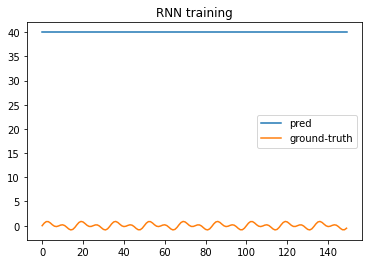

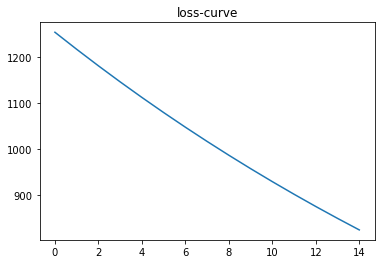

In [66]:
# hyperparameter
epochs = 15
learning_rate = 1e-4
min_val = -200
max_val = 200

node = RNN()

# forward pass
x = X[0]
y = Y[0]
layers,y_hat = node.forward_pass(x)
print(f'layers len {len(layers)}')
print(f'y_hat {y_hat}')

# calculate loss
loss = node.calc_loss(X,Y)
print(f'loss {loss}')

# train
losses = node.train(X,Y,epochs=epochs,learning_rate=1e-4,bptt_truncate = 10,min_val = min_val,max_val = max_val,predict = False)

# predict
preds = node.predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('RNN training')
plt.legend()

#plt.savefig('predict.png')
plt.figure()
plt.plot(losses,label = 'losses')
plt.title('loss-curve')

plt.show()

### comment

Even you don't update for `W_u,U_u,b_u`, `W_r,U_r,b_r`, `W_r,U_r,b_r`, It seem like your model stil work fine sometime

![predicts](predict.png)

### try with other dataset

data lenght: 200
seq_len: 50
num_records: 150
X shape (150, 50, 1)
Y shape (150, 1)
X_val shape (50, 50, 1)
Y_val shape (50, 1)


  1%|▏         | 2/150 [00:00<00:08, 18.35it/s]

epoch: 0 loss: 149.05503001795455


  1%|▏         | 2/150 [00:00<00:11, 13.16it/s]

epoch: 1 loss: 0.16729587851544842


  2%|▏         | 3/150 [00:00<00:05, 25.00it/s]

epoch: 2 loss: 0.15639162685997912


  1%|▏         | 2/150 [00:00<00:08, 18.35it/s]

epoch: 3 loss: 0.14938573377569336


  1%|▏         | 2/150 [00:00<00:08, 17.39it/s]

epoch: 4 loss: 0.14278279191603976


  1%|▏         | 2/150 [00:00<00:09, 15.75it/s]

epoch: 5 loss: 0.1365556584963667


  1%|▏         | 2/150 [00:00<00:07, 18.69it/s]

epoch: 6 loss: 0.1306809305291694


  1%|▏         | 2/150 [00:00<00:08, 18.18it/s]

epoch: 7 loss: 0.12513693035350604


  1%|▏         | 2/150 [00:00<00:07, 18.52it/s]

epoch: 8 loss: 0.11990355219188256


  1%|▏         | 2/150 [00:00<00:08, 18.02it/s]

epoch: 9 loss: 0.11496212538205608


  1%|▏         | 2/150 [00:00<00:07, 18.69it/s]

epoch: 10 loss: 0.11029529146794216


  1%|▏         | 2/150 [00:00<00:08, 16.81it/s]

epoch: 11 loss: 0.10588689356804629


  1%|▏         | 2/150 [00:00<00:08, 18.35it/s]

epoch: 12 loss: 0.10172187663963361


  2%|▏         | 3/150 [00:00<00:05, 26.55it/s]

epoch: 13 loss: 0.09778619742862554


  2%|▏         | 3/150 [00:00<00:05, 27.03it/s]

epoch: 14 loss: 0.09406674304362857


  2%|▏         | 3/150 [00:00<00:05, 25.00it/s]

epoch: 15 loss: 0.09055125722103682


  2%|▏         | 3/150 [00:00<00:05, 25.86it/s]

epoch: 16 loss: 0.08722827345962754


  2%|▏         | 3/150 [00:00<00:05, 26.09it/s]

epoch: 17 loss: 0.08408705430003992


  2%|▏         | 3/150 [00:00<00:05, 26.09it/s]

epoch: 18 loss: 0.08111753610893921


  2%|▏         | 3/150 [00:00<00:05, 26.09it/s]

epoch: 19 loss: 0.07831027880137857


100%|██████████| 150/150 [00:06<00:00, 24.83it/s]


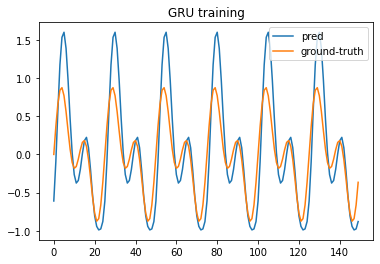

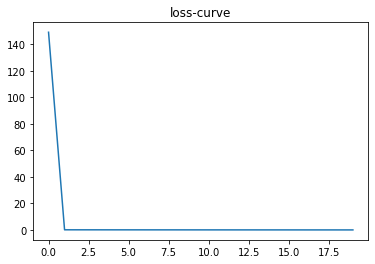

In [75]:
def gen_data(f,seq_len):
    '''
    Generate custom dataset and return all-dataset,x-training,y-training,x-testing,y-testing
    '''
    X = []
    Y = []
    X_val = []
    Y_val = []
    seq_data =  np.array([(0.5*math.sin(1*f*2*np.pi*x) + 0.5*math.sin(2*f*2*np.pi*x)) for x in np.arange(0,0.4,0.002)])
    # training dataset
    num_records = len(seq_data) - seq_len
    for i in range(num_records):
        X.append(seq_data[i:i+seq_len])
        Y.append(seq_data[i+seq_len])
    # testing dataset
    for i in range(num_records - seq_len,num_records):
        X_val.append(seq_data[i:i+seq_len])
        Y_val.append(seq_data[i+seq_len])
    # convert to numpy array
    X = np.array(X)
    Y = np.array(Y)
    X_val = np.array(X_val)
    Y_val = np.array(Y_val)
    # reshape training and testing dataset
    X = np.expand_dims(X,2)
    X_val = np.expand_dims(X_val,2)
    Y = np.expand_dims(Y,1)
    Y_val = np.expand_dims(Y_val,1)
    print(f'data lenght: {len(seq_data)}')
    print(f'seq_len: {seq_len}')
    print(f'num_records: {num_records}')
    print(f'X shape {X.shape}')
    print(f'Y shape {Y.shape}')
    print(f'X_val shape {X_val.shape}')
    print(f'Y_val shape {Y_val.shape}')
    return seq_data,X,Y,X_val,Y_val

# hyperparameter
epochs = 20
learning_rate = 1e-4
min_val = -200
max_val = 200
f = 20
seq_len = 50
seq_data,X,Y,X_val,Y_val = gen_data(f,seq_len)

node = GRU()

# train
losses = node.train(X,Y,epochs=epochs,learning_rate=1e-4,min_val = min_val,max_val = max_val,predict = False)

# predict
preds = node.predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('GRU training')
plt.legend()

#plt.savefig('predict.png')
plt.figure()
plt.plot(losses,label = 'losses')
plt.title('loss-curve')

plt.show()

### GRU Keras

[kaggle](https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)

Use RNN model to predict bitcoin price

[LSTM : Can we predict the Bitcoin price ?](https://www.kaggle.com/code/jeongbinpark/lstm-can-we-predict-the-bitcoin-price)

[Predicting BTC Price Using RNN](https://www.kaggle.com/code/microtang/predicting-btc-price-using-rnn)

[LSTM in bitcoin](https://www.kaggle.com/code/surprise2333333/lstm-in-bitcoin)

[RNN vs LSTM on Bitcoin dataset](https://www.kaggle.com/code/etatbak/rnn-vs-lstm-on-bitcoin-dataset)

Other references

[Time Series Analysis](https://www.kaggle.com/code/kanberburak/time-series-analysis)

[Bitcoin Trading Strategy Simulation](https://www.kaggle.com/code/smitad/bitcoin-trading-strategy-simulation)

[Building an Asset Trading Strategy](https://www.kaggle.com/code/shtrausslearning/building-an-asset-trading-strategy)


In [132]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import models,layers

Load dataset

**Features**

- Timestamp - Start time of time window (60s window), in Unix time
- High - High price within time window
- Low - Low price within time window

In [146]:
# load dataset
df =pd.read_csv('./bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
print(df.shape)
# view your dataframe
df.head()

(4857377, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# drop nall 
df = df.dropna()
print(df.shape)

(3613769, 8)


<AxesSubplot:>

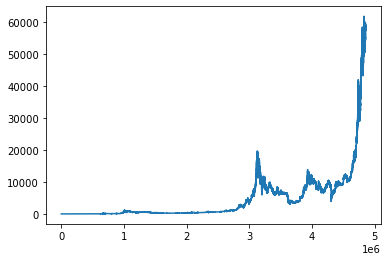

In [148]:
df['price'] = (df['High'] + df['Low'])/2 
df['price'].plot()

In [149]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit = 's')
df['Timestamp']

0         2011-12-31 07:52:00
478       2011-12-31 15:50:00
547       2011-12-31 16:59:00
548       2011-12-31 17:00:00
1224      2012-01-01 04:16:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 3613769, dtype: datetime64[ns]

In [150]:
# drop non-use column
df.drop(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)','Volume_(Currency)', 'Weighted_Price'],axis =1, inplace = True)
df.head()

,Timestamp,price
0,2011-12-31 07:52:00,4.390
478,2011-12-31 15:50:00,4.390
547,2011-12-31 16:59:00,4.535
548,2011-12-31 17:00:00,4.580
1224,2012-01-01 04:16:00,4.580


In [151]:
# set timestamp as index
df = df.set_index('Timestamp')
df.head()

,price
Timestamp,
2011-12-31 07:52:00,4.390
2011-12-31 15:50:00,4.390
2011-12-31 16:59:00,4.535
2011-12-31 17:00:00,4.580
2012-01-01 04:16:00,4.580


In [152]:
df = df.resample('6H').mean()
df.head()

,price
Timestamp,
2011-12-31 06:00:00,4.390000
2011-12-31 12:00:00,4.501667
2011-12-31 18:00:00,NaN
2012-01-01 00:00:00,4.580000
2012-01-01 06:00:00,NaN


In [153]:
df = df.dropna()
print(df.shape)
df.head()

(13376, 1)


,price
Timestamp,
2011-12-31 06:00:00,4.390000
2011-12-31 12:00:00,4.501667
2012-01-01 00:00:00,4.580000
2012-01-01 12:00:00,4.840000
2012-01-01 18:00:00,5.000000


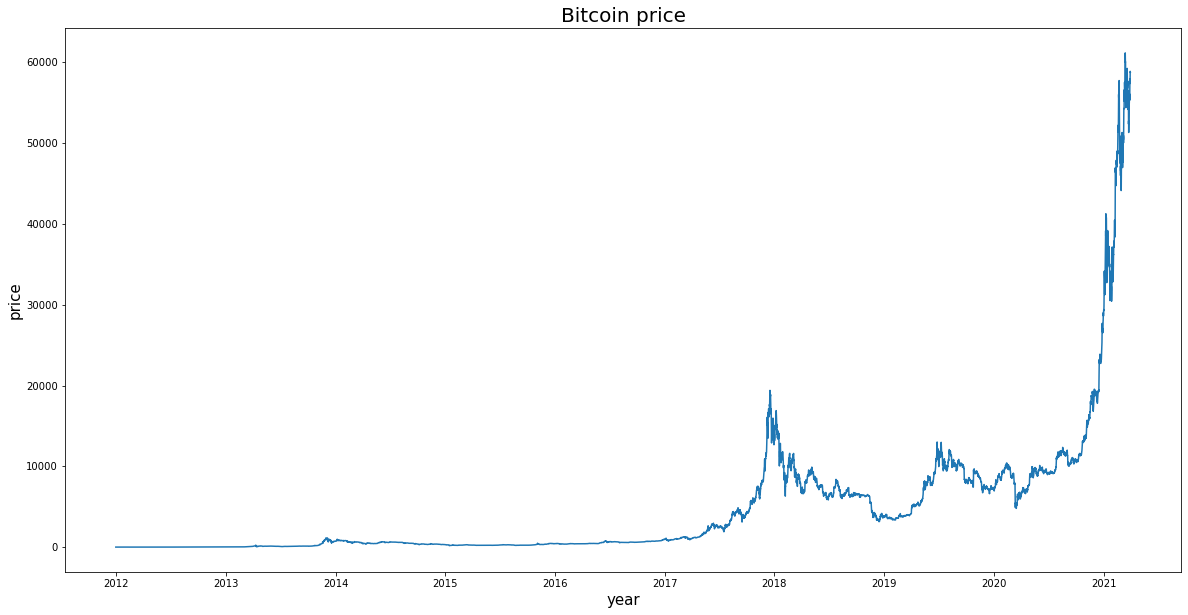

In [154]:
plt.figure(figsize = (20,10))
plt.plot(df)
plt.title('Bitcoin price',fontsize = 20)
plt.xlabel('year',fontsize = 15)
plt.ylabel('price',fontsize = 15)
plt.show()

In [155]:
# scale price to 0-1 for sigmoid activation function
scaler = MinMaxScaler()
price = scaler.fit_transform(np.array(df['price']).reshape(-1,1))
df['price'] = price

In [156]:
df['price'].describe

<bound method NDFrame.describe of Timestamp
2011-12-31 06:00:00    0.000002
2011-12-31 12:00:00    0.000004
2012-01-01 00:00:00    0.000005
2012-01-01 12:00:00    0.000009
2012-01-01 18:00:00    0.000012
                         ...   
2021-03-30 00:00:00    0.938112
2021-03-30 06:00:00    0.954359
2021-03-30 12:00:00    0.962672
2021-03-30 18:00:00    0.961146
2021-03-31 00:00:00    0.960927
Name: price, Length: 13376, dtype: float64>

In [157]:
X = [] 
y = []
m = len(df)
seq_len = 50

for i in range(m-seq_len):
    X.append(df.iloc[i:i+seq_len])
    y.append(df.iloc[i+seq_len])

X = np.array(X)
y = np.array(y)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (13326, 50, 1)
y: (13326, 1)


In [158]:
# split train-test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (10660, 50, 1)
y_train: (10660, 1)
X_test: (2666, 50, 1)
y_test: (2666, 1)


In [159]:
# build model
m_x = layers.Input(shape = X_train.shape[1:])
m_h = layers.GRU(100)(m_x)
m_y = layers.Dense(1)(m_h)
model = models.Model(m_x,m_y)
model.compile('adam','mse',['accuracy'])
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 50, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [160]:
# fit and train your model
epochs = 5
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =epochs,verbose = True)

Epoch 1/5
334/334 [==============================] - 17s 45ms/step - loss: 7.1553e-04 - accuracy: 1.8762e-04 - val_loss: 3.9366e-05 - val_accuracy: 0.0000e+00
Epoch 2/5
334/334 [==============================] - 16s 47ms/step - loss: 3.2497e-05 - accuracy: 1.8762e-04 - val_loss: 4.0709e-05 - val_accuracy: 0.0000e+00
Epoch 3/5
334/334 [==============================] - 17s 49ms/step - loss: 2.9754e-05 - accuracy: 1.8762e-04 - val_loss: 2.5891e-05 - val_accuracy: 0.0000e+00
Epoch 4/5
334/334 [==============================] - 18s 55ms/step - loss: 2.3410e-05 - accuracy: 1.8762e-04 - val_loss: 3.6681e-05 - val_accuracy: 0.0000e+00
Epoch 5/5
334/334 [==============================] - 17s 52ms/step - loss: 2.3985e-05 - accuracy: 1.8762e-04 - val_loss: 2.9072e-05 - val_accuracy: 0.0000e+00


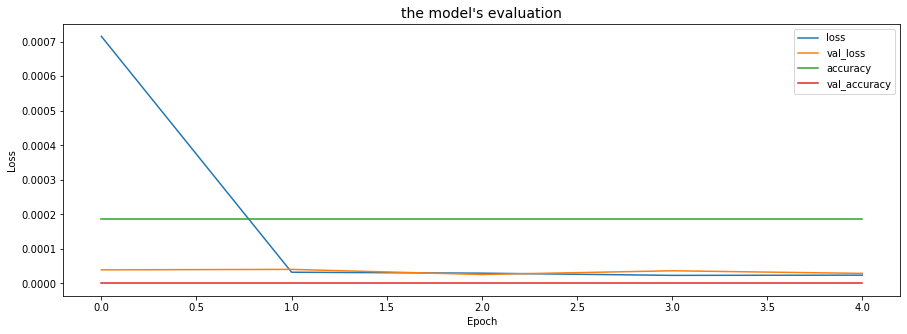

In [161]:
plt.figure(figsize = (15,5))
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.title("the model's evaluation",fontsize = 14)
plt.xlabel('Epoch')
# plt.xlim(2,5)
plt.ylabel('Loss')
plt.show()

In [166]:
print(df.shape)
print(df.head())
np.array(df[:50])

(13376, 1)
                        price
Timestamp                    
2011-12-31 06:00:00  0.000002
2011-12-31 12:00:00  0.000004
2012-01-01 00:00:00  0.000005
2012-01-01 12:00:00  0.000009
2012-01-01 18:00:00  0.000012


array([[2.07473989e-06],
       [3.90078354e-06],
       [5.18173954e-06],
       [9.43342326e-06],
       [1.20498440e-05],
       [1.20498440e-05],
       [1.72826855e-05],
       [1.60211969e-05],
       [1.09051599e-05],
       [1.68271480e-05],
       [2.40690268e-05],
       [3.15258260e-05],
       [3.54341045e-05],
       [3.73691657e-05],
       [3.95222619e-05],
       [3.76689639e-05],
       [3.22180873e-05],
       [4.14845775e-05],
       [4.31198404e-05],
       [4.47551034e-05],
       [4.38557088e-05],
       [3.83176182e-05],
       [3.44529467e-05],
       [3.27631750e-05],
       [3.78267524e-05],
       [4.65211874e-05],
       [4.53001911e-05],
       [4.79014705e-05],
       [4.47551034e-05],
       [4.39374719e-05],
       [4.96608923e-05],
       [4.65538927e-05],
       [3.67423149e-05],
       [4.06669460e-05],
       [4.36610346e-05],
       [4.60269746e-05],
       [3.64425166e-05],
       [3.33082626e-05],
       [4.72079979e-05],
       [4.00829235e-05],


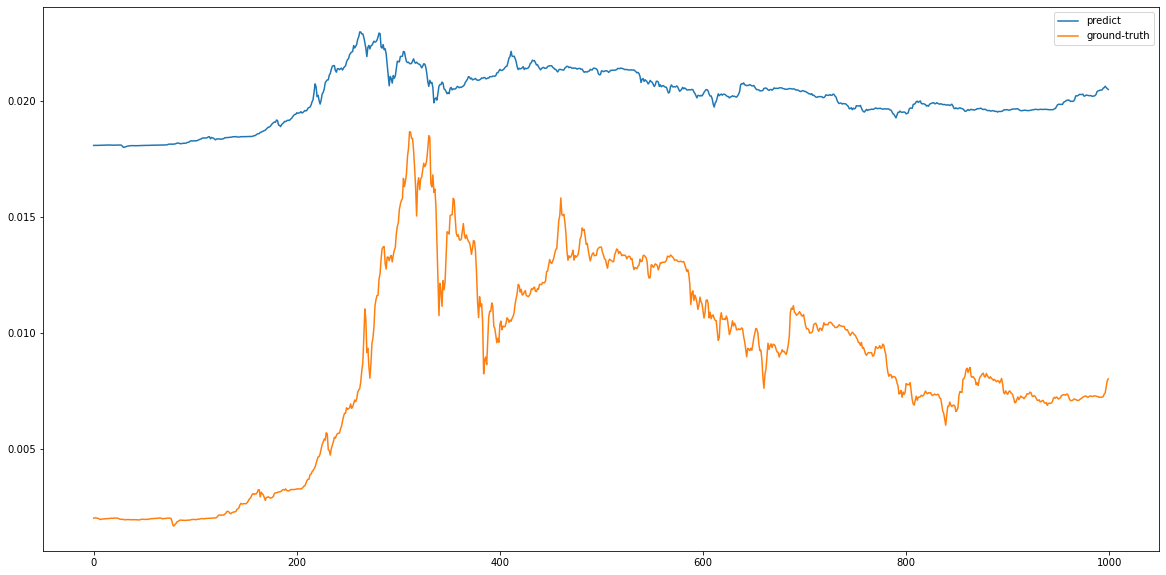

In [195]:
preds = []
step = 1000
start = np.random.randint(len(df)-step-seq_len)
for i in range(start,start + step):
    pred = model.predict(np.array(df[i:i+seq_len]))
    preds.append(pred[-1])

preds = np.array(preds)

plt.figure(figsize = (20,10))
plt.plot(preds,label = 'predict')
plt.plot(np.array(df[start:start + step]),label = 'ground-truth')
plt.legend()
plt.show()

### build LSTM form scratch

Long Short-Term Memory (LSTM) (Hochreiter and Schmidhuber, 1997)

![LSTM](LSTM_1.png)

**Forget State** decide how many we need to take from previous `cell_state`

**Input State** decide how many `input` of the `state` and `hidden layer` of `layer` we need to take from previous

**Output State** decide how many we need to take from previous `cell state` to become `output` of the `hidden state` and for calculating `output` $y_{t}$ for `state` t

**Forward pass**

![LSTM2](LSTM2.png)

**Backward propagation though time**

![LSTM6](LSTM6.png)

In `LSTM` we do care about $\frac{\partial{c_{t}}}{\partial{c_{t-1}}} = f_{t}$ because $ 0 < f_{t} < 1$ so basiclly `LSTM` still have vanishing gradient but it does not effect more as RNN because when we carry information on `cell_state` we don't have to forget the information value in previous cell state so $f_{t} \simeq 1$ so we can avoid vanishing gradient

**Forward pass**

We concate `hidden_state` and `x` become `z` as this equation:

$$ z_{t} = [h_{t-1},x_{t}] $$

By doing this `W` = `(hidden_dim,hidden_dim)` and `U` = `(hidden_dim,seq_len)` in every equation will become one `W` = `(hidden_dim,hidden_dim + seq_len)`

- Forget gate: $f_{t} = \sigma(W_{f}*[h_{t-1},x_{t}] + b_{f})$
    + forget gate decided which information hase been retained or dropped


- Input gate: $i_{t} = \sigma(W_{i}*[h_{t-1},x_{t}] + b_{i})$
    + input gate decided which information should be saved in cell or dropped


- Output gate: $o_{t} = \sigma(W_{o}*[h_{t-1},x_{t}] + b_{o})$
    + ouput gate decided which information should be highlight for the next cell


- Candidate cell state: $\tilde{C_{t}} = tanh(W_{c}*[h_{t-1},x_{t}] + b_{c})$


- Cell state: $C_{t} = i_{t}*\tilde{C_{t}} + f_{t}*C_{t-1}$


- New hidden state: $h_{t} = o_{t} * tanh(C_{t})$

- Predict: $\hat{y_{t}} = V*h_{t} + b_{y}$


[link1](https://github.com/mukul-rathi/deep-learning-tutorials/blob/master/RecurrentNeuralNet/LSTM.ipynb)  [*link2](https://github.com/CaptainE/RNN-LSTM-in-numpy/blob/master/RNN_LSTM_from_scratch.ipynb)  [*link3](https://github.com/gstechgeek/LSTM_from_scratch/blob/main/lstm_archs.py)  [link4](https://github.com/nicodjimenez/lstm/blob/master/lstm.py)  [link5](https://github.com/PNilay/LSTM-Network-from-Scratch/blob/main/Text%20Generation/Text_Generation_LSTM_V2.ipynb)  [*link6](https://github.com/waynemystir/lstm-numpy/blob/master/nl.py)  [link7](https://github.com/zhenpingli/numpy-lstm-/blob/master/numpy_lstm.ipynb)  [link8](https://github.com/jiexunsee/Numpy-LSTM/blob/master/basiclstm.py)  [*link9](https://github.com/StevenElsworth/LSTM_using_numpy/blob/master/LSTM.py)  [link10](https://github.com/EternalFeather/Numpy-based-Model/blob/master/LSTM.py)  [*link11](https://blog.varunajayasiri.com/numpy_lstm.html)

In [196]:
# import the libraries
import tqdm
import math 
import numpy as np
import matplotlib.pyplot as plt

In [197]:
# define activation functions

# sigmoid function get value from 0~1
def sigmoid(x):
    return 1/(1+np.exp(-x))

# tanh function get value from -1~1
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

data lenght: 200
seq_len: 50
num_records: 150
X shape (150, 50, 1)
Y shape (150, 1)
X_val shape (50, 50, 1)
Y_val shape (50, 1)


Text(0.5, 1.0, 'sequence data')

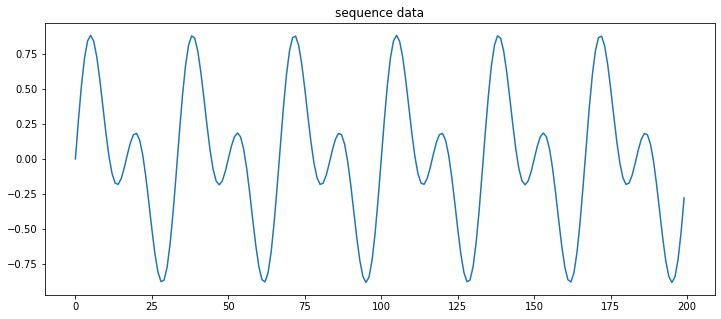

In [198]:
# generate dataset
def gen_data(f,seq_len):
    '''
    Generate custom dataset and return all-dataset,x-training,y-training,x-testing,y-testing
    '''
    X = []
    Y = []
    X_val = []
    Y_val = []
    seq_data =  np.array([(0.5*math.sin(1*f*2*np.pi*x) + 0.5*math.sin(2*f*2*np.pi*x)) for x in np.arange(0,0.4,0.002)])
    # training dataset
    num_records = len(seq_data) - seq_len
    for i in range(num_records):
        X.append(seq_data[i:i+seq_len])
        Y.append(seq_data[i+seq_len])
    # testing dataset
    for i in range(num_records - seq_len,num_records):
        X_val.append(seq_data[i:i+seq_len])
        Y_val.append(seq_data[i+seq_len])
    # convert to numpy array
    X = np.array(X)
    Y = np.array(Y)
    X_val = np.array(X_val)
    Y_val = np.array(Y_val)
    # reshape training and testing dataset
    X = np.expand_dims(X,2)
    X_val = np.expand_dims(X_val,2)
    Y = np.expand_dims(Y,1)
    Y_val = np.expand_dims(Y_val,1)
    print(f'data lenght: {len(seq_data)}')
    print(f'seq_len: {seq_len}')
    print(f'num_records: {num_records}')
    print(f'X shape {X.shape}')
    print(f'Y shape {Y.shape}')
    print(f'X_val shape {X_val.shape}')
    print(f'Y_val shape {Y_val.shape}')
    return seq_data,X,Y,X_val,Y_val

# hyperparameter
seq_len = 50
hidden_dim = 100
input_dim = 1
output_dim = 1
epochs = 6
f = 15
seq_len = 50
seq_data,X,Y,X_val,Y_val = gen_data(f,seq_len)
# visualize the seq_wave
fig = plt.figure(figsize = (12,5))
plt.plot(seq_data)
plt.title('sequence data')

In [199]:
# init matrices we concate hidden_dim and seg_len
# get the example in X and Y
x = X[0]
y = Y[0]
h_prev = np.zeros((hidden_dim,1))
C_prev = np.zeros((hidden_dim,1))
z = np.row_stack((h_prev,x)) # h_t-1,x
print(f'hidden_dim: {hidden_dim}')
print(f'hidden_dim + seq_len: {hidden_dim + seq_len}')
print(f'x: {x.shape}')
print(f'y: {y.shape}')
print(f'z: {z.shape}')
# input gate
W_i = np.zeros((hidden_dim,hidden_dim + seq_len))
b_i = np.zeros((hidden_dim,1))
print(f'W_i: {W_i.shape} b_i: {b_i.shape}')
# forget gate
W_f = np.zeros((hidden_dim,hidden_dim + seq_len))
b_f = np.zeros((hidden_dim,1))
print(f'W_f: {W_f.shape} b_f: {b_f.shape}')
# output gate
W_o = np.zeros((hidden_dim,hidden_dim + seq_len))
b_o = np.zeros((hidden_dim,1))
print(f'W_o: {W_o.shape} b_o: {b_o.shape}')
# candidate cell state
W_c = np.zeros((hidden_dim,hidden_dim + seq_len))
b_c = np.zeros((hidden_dim,1))
print(f'W_c: {W_c.shape} b_c: {b_c.shape}')
# predict state
V = np.zeros((output_dim,hidden_dim))
b_y = np.zeros((1,1))
print(f'V: {V.shape} b_y: {b_y.shape}')
# wrap all your matrices into a dictionary
params = {'W_f':W_f,'b_f':b_f,'W_i':W_i,'b_i':b_i,'W_o':W_o,'b_o':b_o,'W_c':W_c,'b_c':b_c,'V':V,'b_y':b_y}

hidden_dim: 100
hidden_dim + seq_len: 150
x: (50, 1)
y: (1,)
z: (150, 1)
W_i: (100, 150) b_i: (100, 1)
W_f: (100, 150) b_f: (100, 1)
W_o: (100, 150) b_o: (100, 1)
W_c: (100, 150) b_c: (100, 1)
V: (1, 100) b_y: (1, 1)


In [200]:
def init_params(seq_len = 50,hidden_dim = 100,input_dim = 1,output_dim = 1):
    W_i = np.zeros((hidden_dim,hidden_dim + seq_len))
    b_i = np.zeros((hidden_dim,1))
    # forget gate
    W_f = np.zeros((hidden_dim,hidden_dim + seq_len))
    b_f = np.zeros((hidden_dim,1))
    # output gate
    W_o = np.zeros((hidden_dim,hidden_dim + seq_len))
    b_o = np.zeros((hidden_dim,1))
    # candidate cell state
    W_c = np.zeros((hidden_dim,hidden_dim + seq_len))
    b_c = np.zeros((hidden_dim,1))
    # predict state
    V = np.zeros((output_dim,hidden_dim))
    b_y = np.zeros((1,1))
    # wrap all your matrices into a dictionary
    params = {'W_f':W_f,'b_f':b_f,'W_i':W_i,'b_i':b_i,'W_o':W_o,'b_o':b_o,'W_c':W_c,'b_c':b_c,'V':V,'b_y':b_y}
    return params 

In [201]:
# forward pass
# forget state
f_t = sigmoid(W_f @ z + b_f)
print(f'f_t: {f_t.shape}')
# input state
i_t = sigmoid(W_i @ z + b_i)
print(f'i_t: {i_t.shape}')
# output state
o_t = sigmoid(W_o @ z + b_o)
print(f'o_t: {o_t.shape}')
# candidate cell state
C_til = tanh(W_c @ z + b_c)
print(f'C_til: {C_til.shape}')
# cell state
C_t = f_t * C_prev + i_t * C_til
print(f'C_t: {C_til.shape}')
# hidden state
h_t = o_t * tanh(C_t)
print(f'h_t: {h_t.shape}')
# predict output
y_hat = V @ h_t + b_y
print(f'y_hat: {y_hat.shape}')

f_t: (100, 1)
i_t: (100, 1)
o_t: (100, 1)
C_til: (100, 1)
C_t: (100, 1)
h_t: (100, 1)
y_hat: (1, 1)


In [202]:
def forward_pass(h_prev,C_prev,x,params):
    # row-stack h_prev and x
    z = np.row_stack((h_prev,x))
    # forget state
    f_t = sigmoid(params['W_f'] @ z + params['b_f'])
    # input state
    i_t = sigmoid(params['W_i'] @ z + params['b_i'])
    # output state
    o_t = sigmoid(params['W_o'] @ z + params['b_o'])
    # candidate cell state
    C_til = tanh(params['W_c'] @ z + params['b_c'])
    # cell state
    C_t = f_t * C_prev + i_t * C_til #trying to make a change in hopless
    # hidden state
    h_t = o_t * tanh(C_t)
    # predict output
    y_hat = params['V'] @ h_t + params['b_y']
    return h_prev,C_prev,f_t,i_t,o_t,C_til,C_t,h_t,y_hat

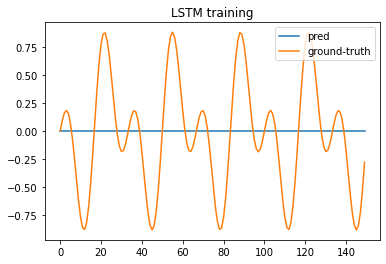

In [203]:
# init params
params = init_params()

# init previous state
h_prev = np.zeros((hidden_dim,1))
C_prev = np.zeros((hidden_dim,1))

# preds 
preds = []

for i in range(Y.shape[0]):
    x,y = X[i],Y[i]
    # feed forward
    h_prev,C_prev,f_t,i_t,o_t,C_til,C_t,h_t,y_hat = forward_pass(h_prev,C_prev,x,params)
    preds.append(y_hat)

preds = np.array(preds)
preds = np.squeeze(preds)

# predict
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('LSTM training')
plt.legend()
plt.show()

In [204]:
# calculate loss
L_t  = (y - y_hat)**2
print(f'Loss at the first step: {L_t}')

Loss at the first step: [[0.07714669]]


In [205]:
def pred_loss(X,Y,params):
    
    m = X.shape[0] # the number of sample
    
    # storage predict
    preds = []
    
    # init previous state
    h_prev = np.zeros((hidden_dim,1))
    C_prev = np.zeros((hidden_dim,1))
    
    for i in range(Y.shape[0]):
        # init
        x,y  = X[i],Y[i]
        # forward pass
        h_prev,C_prev,f_t,i_t,o_t,C_til,C_t,h_t,y_hat = forward_pass(h_prev,C_prev,x,params)
        # preds
        preds.append(y_hat)
        
    # convert your predict list into numpy array   
    preds = np.array(preds)
    preds = np.squeeze(preds)
    
    # calculate the loss
    loss = 1/(2*m)*np.sum((preds - np.squeeze(Y)**2))
    
    return preds,loss

In [206]:
# init params
params = init_params()

preds,loss = pred_loss(X,Y,params)

print(preds.shape)

print(f'loss: {loss}')

(150,)
loss: -0.125


**Backpropagation pass**

this backpropagation implement follow this [blog](https://blog.varunajayasiri.com/numpy_lstm.html), in backward pass you have to the calculatation from the end to the top, meaning the `next differentials` is calculated from the previous timestep 

*Note:*

- differential at current timestep of `hidden_state` : $\frac{\partial{L}}{\partial{h_{t}}} = \frac{\partial{L_{t}}}{\partial{h_{t}}}$

- differential at current timestep of `cell state` : $\frac{\partial{L}}{\partial{C_{t}}} = \frac{\partial{L_{t}}}{\partial{C_{t}}}$

$$ \frac{\partial{L}}{\partial{\hat{y_{t}}}} = y_{t} - \hat{y_{t}} \space [1]$$

$$ \frac{\partial{L}}{\partial{h_{t}}}  =  \frac{\partial{L_{t+1}}}{\partial{h_{t}}} + \frac{\partial{L}}{\partial{\hat{y}_{t}}} \frac{\partial{\hat{y_{t}}}}{\partial{h_{t}}} = \frac{\partial{L_{t+1}}}{\partial{h_{t}}} + V^{T} *\frac{\partial{L}}{\partial{\hat{y}_{t}}} \space [2]$$

$$ \frac{\partial{L}}{\partial{C_{t}}} = \frac{\partial{L_{t+1}}}{\partial{C_{t}}} + \frac{\partial{L}}{\partial{h_{t}}} \frac{\partial{h_{t}}}{\partial{C_{t}}} = \frac{\partial{L_{t+1}}}{\partial{C_{t}}} + \frac{\partial{L}}{\partial{h_{t}}}* o_{t}*(1-tanh(C_{t})^{2}) \space [3]$$

$$ \frac{\partial{L}}{\partial{\tilde{C_{t}}}} = \frac{\partial{L}}{\partial{C_{t}}}\frac{\partial{C_{t}}}{\partial{\tilde{C_{t}}}} =  \frac{\partial{L}}{\partial{C_{t}}} * i_{t} \space [4] $$

$$ \frac{\partial{L}}{\partial{o_{t}}} = \frac{\partial{L}}{\partial{h_{t}}}\frac{\partial{h_{t}}}{\partial{o_{t}}} =  \frac{\partial{L}}{\partial{h_{t}}} * tanh(C_{t}) \space [5]$$

$$ \frac{\partial{L}}{\partial{i_{t}}} = \frac{\partial{L}}{\partial{C_{t}}}\frac{\partial{C_{t}}}{\partial{i_{t}}} = \frac{\partial{L}}{\partial{C_{t}}} * \tilde{C_{t}} \space [6] $$

$$ \frac{\partial{L}}{\partial{f_{t}}} = \frac{\partial{L}}{\partial{C_{t}}}\frac{\partial{C_{t}}}{\partial{f_{t}}} = \frac{\partial{L}}{\partial{C_{t}}} * C_{t-1} \space [7] $$

Because $ z_{t} = [h_{t-1},x_{t}] $ so $ \frac{\partial{L}}{\partial{z_{t}}} = [\frac{\partial{L}}{\partial{h_{t-1}}},\frac{\partial{L}}{\partial{x_{t}}}] = [\frac{\partial{L_{t}}}{\partial{h_{t-1}}},\frac{\partial{L}}{\partial{x_{t}}}]$ We will forcus on $\frac{\partial{L_{t}}}{\partial{h_{t-1}}}$ we will use this term to the next calculation as `next differentials` of `hidden_state`

$$ \frac{\partial{L}}{\partial{z_{t}}} = \frac{\partial{L}}{\partial{f_{t}}}\frac{\partial{f_{t}}}{\partial{z_{t}}} + \frac{\partial{L}}{\partial{i_{t}}}\frac{\partial{i_{t}}}{\partial{z_{t}}} + \frac{\partial{L}}{\partial{C_{t}}}\frac{\partial{C_{t}}}{\partial{z_{t}}} + \frac{\partial{L}}{\partial{o_{t}}}\frac{\partial{o_{t}}}{\partial{z_{t}}} $$

$$ \frac{\partial{L}}{\partial{z_{t}}} = W_f^{T}*f_{t}*(1-f_{t})*\frac{\partial{L}}{\partial{f_{t}}} +  W_i^{T}*i_{t}*(1-i_{t})*\frac{\partial{L}}{\partial{i_{t}}} + W_C^{T}*(1-\tilde{C_{t}}^{2})*\frac{\partial{L}}{\partial{C_{t}}} +  W_o^{T}*o_{t}*(1-o_{t})*\frac{\partial{L}}{\partial{o_{t}}} \space [8]$$

$$ \frac{\partial{L_{t}}}{\partial{{C_{t-1}}}} = \frac{\partial{L}}{\partial{{C_{t}}}} \frac{\partial{C_{t}}}{\partial{C_{t-1}}} = f_{t} * \frac{\partial{L}}{\partial{C_{t}}} \space [9] $$ 

we will use this term to the next calculation as `next differentials` of `cell_state`

Model parameter gradient

$$ \frac{\partial{L}}{\partial{V}} = \frac{\partial{L}}{\partial{\hat{y_{t}}}} \frac{\partial{\hat{y_{t}}}}{\partial{V}} = \frac{\partial{L}}{\partial{\hat{y_{t}}}} . h_{t}^{T} \space [10] $$

$$ \frac{\partial{L}}{\partial{b_{y}}} = \frac{\partial{L}}{\partial{\hat{y_{t}}}} \space [11] $$

$$ \frac{\partial{L}}{\partial{W_c}} = \frac{\partial{L}}{\partial{\tilde{C_{t}}}} \frac{\partial{\tilde{C_{t}}}}{\partial{W_{c}}} = \frac{\partial{L}}{\partial{\tilde{C_{t}}}} * (1-\tilde{C_{t}}^{2}) . z_{t}^{T} \space [12]$$

$$ \frac{\partial{L}}{\partial{b_c}} = \frac{\partial{L}}{\partial{\tilde{C_{t}}}} \frac{\partial{\tilde{C_{t}}}}{\partial{b_{c}}} = \frac{\partial{L}}{\partial{\tilde{C_{t}}}} * (1-\tilde{C_{t}}^{2}).1 \space [13]$$

$$ \frac{\partial{L}}{\partial{W_o}} = \frac{\partial{L}}{\partial{o_{t}}} \frac{\partial{o_{t}}}{\partial{W_{o}}} = \frac{\partial{L}}{\partial{o_{t}}}*o_{t}*(1-o_{t}).z_{t}^{T} \space [14]$$

$$ \frac{\partial{L}}{\partial{b_o}} = \frac{\partial{L}}{\partial{f_{o}}} \frac{\partial{f_{o}}}{\partial{b_{o}}} = \frac{\partial{L}}{\partial{f_{o}}}*o_{t}*(1-o_{t}).1 \space [15]$$

$$ \frac{\partial{L}}{\partial{W_i}} = \frac{\partial{L}}{\partial{i_{t}}} \frac{\partial{i_{t}}}{\partial{W_{i}}} = \frac{\partial{L}}{\partial{i_{t}}}*i_{t}*(1-i_{t}).z_{t}^{T} \space [16]$$

$$ \frac{\partial{L}}{\partial{b_i}} = \frac{\partial{L}}{\partial{i_{t}}} \frac{\partial{i_{t}}}{\partial{b_{i}}} = \frac{\partial{L}}{\partial{i_{t}}}*i_{t}*(1-i_{t}).1 \space [17]$$

$$ \frac{\partial{L}}{\partial{W_f}} = \frac{\partial{L}}{\partial{f_{t}}} \frac{\partial{f_{t}}}{\partial{W_{f}}} = \frac{\partial{L}}{\partial{f_{t}}}*f_{t}*(1-f_{t}).z_{t}^{T} \space [18]$$

$$ \frac{\partial{L}}{\partial{b_f}} = \frac{\partial{L}}{\partial{f_{t}}} \frac{\partial{f_{t}}}{\partial{b_{f}}} = \frac{\partial{L}}{\partial{f_{t}}}*f_{t}*(1-f_{t}).1 \space [19]$$

After that we will do the gradient descent
$$ V += lr * \frac{\partial{L}}{\partial{V}} \space;\space b_y += lr * \frac{\partial{L}}{\partial{b_y}}$$
$$ W_c += lr * \frac{\partial{L}}{\partial{W_c}} \space;\space b_c  += lr * \frac{\partial{L}}{\partial{b_c}}$$

$$ W_o += lr * \frac{\partial{L}}{\partial{W_o}} \space;\space b_o  += lr * \frac{\partial{L}}{\partial{b_o}}$$

$$ W_i += lr * \frac{\partial{L}}{\partial{W_i}} \space;\space b_i  += lr * \frac{\partial{L}}{\partial{b_i}}$$

$$ W_f  += lr * \frac{\partial{L}}{\partial{W_f}} \space;\space b_f  += lr * \frac{\partial{L}}{\partial{b_f}}$$


In [207]:
# backward pass
# in the begining we have to init dLdC_next and dLdh_next as zero
dLdC_next = np.zeros((hidden_dim,1))
dLdh_next = np.zeros((hidden_dim,1))
# [1] dLdy
dLdy = y - y_hat
print(f'dLdy: {dLdy.shape}')
# [2] dLdh
dLdh = dLdh_next + V.T @ dLdy # (100,1) + (100,1)x(1,1)
print(f'dLdh: {dLdh.shape}')
# [3] dLdC
dLdC = dLdC_next + dLdh * o_t * (1-tanh(C_t)**2)
print(f'dLdC: {dLdC.shape}')
# [4] dLdC_til
dLdC_til = dLdC * i_t
print(f'dLdC_til: {dLdC_til.shape}')
# [5] dLdo
dLdo = dLdh * tanh(C_t)
print(f'dLdo: {dLdo.shape}')
# [6] dLdi
dLdi = dLdC * C_til
print(f'dLdi: {dLdi.shape}')
# [7] dLdi
dLdf = dLdC * C_prev
print(f'dLdf: {dLdf.shape}')
# [8] dLdz
dLdz = W_f.T @ (f_t*(1-f_t)*dLdf) + W_i.T @ (i_t*(1-i_t)*dLdi) + W_c.T @ ((1-C_til**2)*dLdC_til) + W_o.T @ (o_t*(1-o_t)*dLdo)
print(f'dLdz: {dLdz.shape}')
# update dLdC_next and dLdh_next
dLdC_next = f_t * dLdC
print(f'dLdC_next: {dLdC_next.shape}')
dLdh_next = dLdz[:100]
print(f'dLdh_next: {dLdh_next.shape}')
# calculate model parameter gradient
dLdV = dLdy @ h_t.T
dLdb_y = dLdy
print(f'dLdV: {dLdV.shape}')
print(f'dLdb_y: {dLdb_y.shape}')
dLdW_c = dLdC_til @ z.T
dLdb_c = dLdC_til
print(f'dLdW_c: {dLdW_c.shape}')
print(f'dLdb_c: {dLdb_c.shape}')
dLdW_o = dLdo @ z.T
dLdb_o = dLdo
print(f'dLdW_o: {dLdW_o.shape}')
print(f'dLdb_o: {dLdb_o.shape}')
dLdW_i = dLdi @ z.T
dLdb_i = dLdi
print(f'dLdW_i: {dLdW_i.shape}')
print(f'dLdb_i: {dLdb_i.shape}')
dLdW_f = dLdf @ z.T
dLdb_f = dLdf
print(f'dLdW_f: {dLdW_f.shape}')
print(f'dLdb_f: {dLdb_f.shape}')

dLdy: (1, 1)
dLdh: (100, 1)
dLdC: (100, 1)
dLdC_til: (100, 1)
dLdo: (100, 1)
dLdi: (100, 1)
dLdf: (100, 1)
dLdz: (150, 1)
dLdC_next: (100, 1)
dLdh_next: (100, 1)
dLdV: (1, 100)
dLdb_y: (1, 1)
dLdW_c: (100, 150)
dLdb_c: (100, 1)
dLdW_o: (100, 150)
dLdb_o: (100, 1)
dLdW_i: (100, 150)
dLdb_i: (100, 1)
dLdW_f: (100, 150)
dLdb_f: (100, 1)


In [208]:
def backward_pass(x,y,z,t,layers,params,dLdh_next,dLdC_next):
    # [1] dLdy
    dLdy = y - layers[t]['y_hat']
    # [2] dLdh
    dLdh = dLdh_next + params['V'].T @ dLdy 
    # [3] dLdC
    dLdC = dLdC_next + dLdh * layers[t]['o'] * (1-tanh(layers[t]['c'])**2)
    # [4] dLdC_til
    dLdC_til = dLdC * layers[t]['i']
    # [5] dLdo
    dLdo = dLdh * tanh(layers[t]['c'])
    # [6] dLdi
    dLdi = dLdC * layers[t]['c_til']
    # [7] dLdi
    dLdf = dLdC * layers[t]['c_prev']
    # [8] dLdz
    dLdz =params['W_f'].T @ (layers[t]['f']*(1-layers[t]['f'])*dLdf) + \
    params['W_i'].T @ (layers[t]['i']*(1-layers[t]['i'])*dLdi) + \
    params['W_c'].T @ ((1-layers[t]['c_til']**2)*dLdC_til) + \
    params['W_o'].T @ (layers[t]['o']*(1-layers[t]['o'])*dLdo)
    # update dLdC_next and dLdh_next
    dLdC_next = layers[t]['f'] * dLdC
    dLdh_next = dLdz[:100]
    # calculate model parameter gradient
    dLdV = dLdy @ layers[t]['h'].T
    dLdb_y = dLdy
    dLdW_c = dLdC_til @ z.T
    dLdb_c = dLdC_til
    dLdW_o = dLdo @ z.T
    dLdb_o = dLdo
    dLdW_i = dLdi @ z.T
    dLdb_i = dLdi
    dLdW_f = dLdf @ z.T
    dLdb_f = dLdf
    
    return dLdC_next,dLdh_next,dLdV,dLdb_y,dLdW_c,dLdb_c,dLdW_o,dLdb_o,dLdW_i,dLdb_i,dLdW_f,dLdb_f

In [209]:
def init_grads(params):
    # for backward
    dLdV = np.zeros(params['V'].shape)
    dLdb_y = np.zeros(params['b_y'].shape)
    dLdW_c = np.zeros(params['W_c'].shape)
    dLdb_c = np.zeros(params['b_c'].shape)
    dLdW_o = np.zeros(params['W_o'].shape)
    dLdb_o = np.zeros(params['b_o'].shape)
    dLdW_i = np.zeros(params['W_i'].shape)
    dLdb_i = np.zeros(params['b_i'].shape)
    dLdW_f = np.zeros(params['W_f'].shape)
    dLdb_f = np.zeros(params['b_f'].shape)

    grads = {'dLdV':dLdV,'dLdb_y':dLdb_y,
             'dLdW_c':dLdW_c,'dLdb_c':dLdb_c,
             'dLdW_o':dLdW_o,'dLdb_o':dLdb_o,
             'dLdW_i':dLdW_i,'dLdb_i':dLdb_i,
             'dLdW_f':dLdW_f,'dLdb_f':dLdb_f}
    
    return grads

In [210]:
# init params
params = init_params()

layers = []

# for backward
grads = init_grads(params)

# FORWARD PASS
# init previous state
h_prev = np.zeros((hidden_dim,1))
C_prev = np.zeros((hidden_dim,1))

for t in range(Y.shape[0]):
    x,y = X[t],Y[t]
    # feed forward
    h_prev,C_prev,f_t,i_t,o_t,c_til,c_t,h_t,y_hat = forward_pass(h_prev,C_prev,x,params) # i do a litle trick here
    layers.append({'h_prev':h_prev,'c_prev':C_prev,'f':f_t,'i':i_t,'o':o_t,'c_til':c_til,'c':c_t,'h':h_t,'y_hat':y_hat})
    
# BACKWARD PASS
dLdC_next = np.zeros((hidden_dim,1))
dLdh_next = np.zeros((hidden_dim,1))

for t in reversed(range(Y.shape[0])):
    x,y = X[t],Y[t]
    z = np.concatenate((layers[t]['h'],x))
    dLdC_next,dLdh_next,dLdV,dLdb_y,dLdW_c,dLdb_c,dLdW_o,dLdb_o,dLdW_i,dLdb_i,dLdW_f,dLdb_f = backward_pass(x,y,z,t,layers,params,dLdh_next,dLdC_next)
    # accumlate the differential
    grads['dLdV'] += dLdV
    grads['dLdb_y'] += dLdb_y
    grads['dLdW_c'] += dLdW_c
    grads['dLdb_c'] += dLdb_c
    grads['dLdW_o'] += dLdW_o
    grads['dLdb_o'] += dLdb_o
    grads['dLdW_i'] += dLdW_i
    grads['dLdb_i'] += dLdb_i
    grads['dLdW_f'] += dLdW_f
    grads['dLdb_f'] += dLdb_f

In [211]:
def train(hidden_dim,X,Y,params,grads):
    
    layers = [] # layers storage params in forward pass
    
    # FORWARD PASS
    # init previous state
    h_prev = np.zeros((hidden_dim,1))
    C_prev = np.zeros((hidden_dim,1))

    for t in range(Y.shape[0]):
        x,y = X[t],Y[t]
        # feed forward
        h_prev,C_prev,f_t,i_t,o_t,c_til,c_t,h_t,y_hat = forward_pass(h_prev,C_prev,x,params) # i do a litle trick here
        layers.append({'h_prev':h_prev,
                       'c_prev':C_prev,
                       'f':f_t,
                       'i':i_t,
                       'o':o_t,
                       'c_til':c_til,
                       'c':c_t,
                       'h':h_t,
                       'y_hat':y_hat}
                     )

    # BACKWARD PASS
    dLdC_next = np.zeros((hidden_dim,1))
    dLdh_next = np.zeros((hidden_dim,1))

    for t in reversed(range(Y.shape[0])): # change reversed
        x,y = X[t],Y[t]
        z = np.concatenate((layers[t]['h'],x))
        dLdC_next,dLdh_next,dLdV,dLdb_y,dLdW_c,dLdb_c,dLdW_o,dLdb_o,dLdW_i,dLdb_i,dLdW_f,dLdb_f = backward_pass(x,y,z,t,layers,params,dLdh_next,dLdC_next)
        # accumlate the differential
        grads['dLdV'] += dLdV
        grads['dLdb_y'] += dLdb_y
        grads['dLdW_c'] += dLdW_c
        grads['dLdb_c'] += dLdb_c
        grads['dLdW_o'] += dLdW_o
        grads['dLdb_o'] += dLdb_o
        grads['dLdW_i'] += dLdW_i
        grads['dLdb_i'] += dLdb_i
        grads['dLdW_f'] += dLdW_f
        grads['dLdb_f'] += dLdb_f
        
    return grads

In [212]:
# hyperparameter
seq_len = 20
hidden_dim = 100
output_dim = 1
epochs = 50
seq_len = 50
learning_rate = 1e-3
stopping_loss = 0.002

# init params
params = init_params()

for epoch in range(epochs):
    
    # calculate the loss
    preds,loss = pred_loss(X,Y,params)
    print(f'epoch: {epoch} loss: {loss}')
    
    if abs(loss) < stopping_loss:
        print(f'epoch: {epoch} STOP TRAINING!')
        break
    
    # init gradients
    grads = init_grads(params)
    
    # get gradients
    grads = train(hidden_dim,X,Y,params,grads)
    
    # update gradient descent
    params['V'] -= learning_rate * grads['dLdV']
    params['b_y'] -= learning_rate * grads['dLdb_y']
    params['W_o'] -= learning_rate * grads['dLdW_o']
    params['b_o'] -= learning_rate * grads['dLdb_o']
    params['W_c'] -= learning_rate * grads['dLdW_c']
    params['b_c'] -= learning_rate * grads['dLdb_c']
    params['W_i'] -= learning_rate * grads['dLdW_i']
    params['b_i'] -= learning_rate * grads['dLdb_i']
    params['W_f'] -= learning_rate * grads['dLdW_f']
    params['b_f'] -= learning_rate * grads['dLdb_f']
    

epoch: 0 loss: -0.125
epoch: 1 loss: -0.12235527625164859
epoch: 2 loss: -0.11931384394104451
epoch: 3 loss: -0.1158161967838498
epoch: 4 loss: -0.11179390255307586
epoch: 5 loss: -0.10716826418768587
epoch: 6 loss: -0.10184878006748734
epoch: 7 loss: -0.09573137332925906
epoch: 8 loss: -0.08869635558029652
epoch: 9 loss: -0.0806060851689896
epoch: 10 loss: -0.07130227419598667
epoch: 11 loss: -0.060602891577033274
epoch: 12 loss: -0.048298601565236875
epoch: 13 loss: -0.034148668051671015
epoch: 14 loss: -0.017876244511070272
epoch: 15 loss: 0.0008370425606205689
epoch: 15 STOP TRAINING!


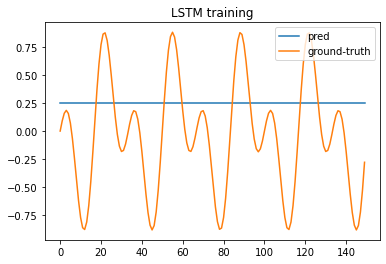

In [213]:
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('LSTM training')
plt.legend()
plt.show()

In [88]:
class LSTM():
    def __init__(self,seq_len = 50,hidden_dim = 100,input_dim = 1,output_dim = 1):
        self.seq_len = seq_len
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        self.output_dim = output_dim
        # init matrices
        # input gate
        self.W_i = np.zeros((hidden_dim,hidden_dim + seq_len))
        self.b_i = np.zeros((hidden_dim,1))
        # forget gate
        self.W_f = np.zeros((hidden_dim,hidden_dim + seq_len))
        self.b_f = np.zeros((hidden_dim,1))
        # output gate
        self.W_o = np.zeros((hidden_dim,hidden_dim + seq_len))
        self.b_o = np.zeros((hidden_dim,1))
        # candidate cell state
        self.W_c = np.zeros((hidden_dim,hidden_dim + seq_len))
        self.b_c = np.zeros((hidden_dim,1))
        # predict state
        self.V = np.zeros((output_dim,hidden_dim))
        self.b_y = np.zeros((1,1))
        
    def forward_pass(self,x):
        layers = []
        # init matrices
        h_prev = np.zeros((self.hidden_dim,1))
        C_prev = np.zeros((self.hidden_dim,1))
        for t in range(x.shape[0]):
            # new_input
            x_t = np.zeros(x.shape)
            x_t[t] = x[t]
            # z
            z = np.row_stack((h_prev,x_t))
            # forget state
            f_t = sigmoid(self.W_f @ z + self.b_f)
            # input state
            i_t = sigmoid(self.W_i @ z + self.b_i)
            # output state
            o_t = sigmoid(self.W_o @ z + self.b_o)
            # candidate cell state
            C_til = tanh(self.W_c @ z + self.b_c)
            # cell state
            C_t = f_t * C_prev + i_t * C_til
            # hidden state
            h_t = o_t * tanh(C_t)
            # predict output
            y_hat = self.V @ h_t + self.b_y
            layers.append({'z':z,'h_prev':h_prev,'h':h_t,'C_prev':C_prev,'C_til':C_til,'C':C_t,'o':o_t,'i':i_t,'f':f_t})
            # update previous cell state and hidden state
            h_prev = h_t
            C_prev = C_t
        return layers,y_hat
    
    def calc_loss(self,X,Y):
        loss = 0.0
        m = Y.shape[0]
        for i in range(m):
            x,y = X[i],Y[i]
            _,y_hat = self.forward_pass(x)
            loss += (y-y_hat)**2
        loss = 1/(2*m) * np.float(loss)
        return loss

    def predict(self,X):
        preds = []
        m = X.shape[0] # number of samples
        for i in range(m):
            x = X[i]
            _,y_hat = self.forward_pass(x)
            preds.append(y_hat)
        # convert to numpy array
        preds = np.array(preds)
        preds = np.squeeze(preds)
        return preds
    
    def bptt(self,x,y,layers,y_hat,dLdh_next,dLdC_next,min_val=-10,max_val=10):
        # backward pass
        # in the begining matrices
        dLdV = np.zeros(self.V.shape)
        dLdb_y = np.zeros(self.b_y.shape)
        dLdW_c = np.zeros(self.W_c.shape)
        dLdb_c = np.zeros(self.b_c.shape)
        dLdW_o = np.zeros(self.W_o.shape)
        dLdb_o = np.zeros(self.b_o.shape)
        dLdW_i = np.zeros(self.W_i.shape)
        dLdb_i = np.zeros(self.b_i.shape)
        dLdW_f = np.zeros(self.W_f.shape)
        dLdb_f = np.zeros(self.b_f.shape)
        # [1] dLdy
        dLdy = y - y_hat
        for t in reversed(range(x.shape[0])):
            # [2] dLdh
            dLdh = dLdh_next + self.V.T @ dLdy # (100,1) + (100,1)x(1,1)
            # [3] dLdC
            dLdC = dLdC_next + dLdh * layers[t]['o'] * (1-tanh(layers[t]['C'])**2)
            # [4] dLdC_til
            dLdC_til = dLdC * layers[t]['i']
            # [5] dLdo
            dLdo = dLdh * tanh(layers[t]['C'])
            # [6] dLdi
            dLdi = dLdC * C_til
            # [7] dLdi
            dLdf = dLdC * C_prev
            # [8] dLdz
            dLdz = W_f.T @ (layers[t]['f']*(1-layers[t]['f'])*dLdf) + W_i.T @ (layers[t]['i']*(1-layers[t]['i'])*dLdi) +\
            W_c.T @ ((1-C_til**2)*dLdC_til) + W_o.T @ (layers[t]['o']*(1-layers[t]['o'])*dLdo)
            # update dLdC_next and dLdh_next
            dLdC_next = layers[t]['f'] * dLdC
            dLdh_next = dLdz[:100]
            # calculate model parameter gradient
            dLdV += dLdy @ layers[t]['h'].T
            dLdb_y += dLdy
            dLdW_c += dLdC_til @ z.T
            dLdb_c += dLdC_til
            dLdW_o += dLdo @ layers[t]['z'].T
            dLdb_o += dLdo
            dLdW_i += dLdi @ layers[t]['z'].T
            dLdb_i += dLdi
            dLdW_f += dLdf @ layers[t]['z'].T
            dLdb_f += dLdf
        
        return dLdC_next, dLdh_next,dLdV,dLdb_y,dLdW_c, dLdb_c, dLdW_o, dLdb_o, dLdW_i, dLdb_i, dLdW_f,dLdb_f
    
    def train (self,X,Y,epochs,learning_rate,min_val,max_val,verbose = True):
        # storage lost
        losses = []
        for epoch in range(epochs):
            loss = self.calc_loss(X,Y)
            losses.append(loss)
            title = f'epoch: {epoch} loss: {loss}'
            if verbose: print(title)
                
            dLdC_next = np.zeros((hidden_dim,1))
            dLdh_next = np.zeros((hidden_dim,1))
            
            for i in tqdm.tqdm(range(X.shape[0])):
                x,y = X[i],Y[i]
                # forward pass
                layers,y_hat = self.forward_pass(x)
                # backward pass
                dLdC_next, dLdh_next,dLdV,dLdb_y,dLdW_c, dLdb_c, dLdW_o, dLdb_o, dLdW_i, dLdb_i, dLdW_f,dLdb_f = self.bptt(x,y,layers,y_hat,dLdh_next,dLdC_next,min_val=min_val,max_val=max_val)
                # gradient descent
                self.V -= learning_rate * dLdV
                self.b_y -= learning_rate * dLdb_y
                self.W_c -= learning_rate * dLdW_c
                self.b_c -= learning_rate * dLdb_c
                self.W_o -= learning_rate * dLdW_o
                self.b_o -= learning_rate * dLdb_o
                self.W_i -= learning_rate * dLdW_i
                self.b_i -= learning_rate * dLdb_i
                self.W_f -= learning_rate * dLdW_f
                self.b_f -= learning_rate * dLdb_f
        
        return losses
        

In [90]:
node = LSTM()

layers,y_hat = node.forward_pass(x)
print(f'y_hat: {y_hat}')

loss = node.calc_loss(X,Y)
print(f'loss: {loss}')

y_hat: [[0.]]
loss: 0.125


  2%|▏         | 3/150 [00:00<00:05, 27.03it/s]

epoch: 0 loss: 0.125


  2%|▏         | 3/150 [00:00<00:05, 25.42it/s]

epoch: 1 loss: 3666.2370108048976


  2%|▏         | 3/150 [00:00<00:05, 26.31it/s]

epoch: 2 loss: 8340916929.209294


  2%|▏         | 3/150 [00:00<00:05, 25.00it/s]

epoch: 3 loss: 1.8967219126455024e+16


  2%|▏         | 3/150 [00:00<00:05, 27.52it/s]

epoch: 4 loss: 4.3131382873443545e+22


  2%|▏         | 3/150 [00:00<00:05, 25.42it/s]

epoch: 5 loss: 9.80805976754925e+28


100%|██████████| 150/150 [00:05<00:00, 28.54it/s]


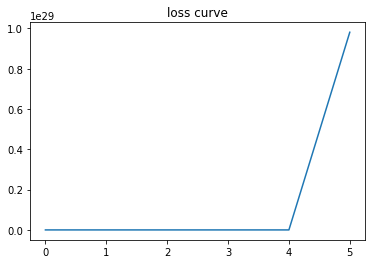

In [91]:
# hyperparameter
epochs = 6
learning_rate = 1e-3
min_val = -200
max_val = 200

node = LSTM()

losses = node.train(X,Y,epochs,learning_rate,min_val,max_val)

plt.plot(losses)
plt.title('loss curve')
plt.show()

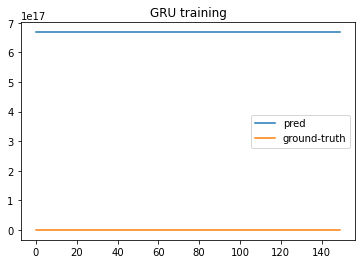

In [92]:
# predict
preds = node.predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('GRU training')
plt.legend()
plt.show()

** Use keras API for solving my problem **

In [101]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

data lenght: 200
seq_len: 50
num_records: 150
X shape (150, 50, 1)
Y shape (150, 1)
X_val shape (50, 50, 1)
Y_val shape (50, 1)


Text(0.5, 1.0, 'sequence data')

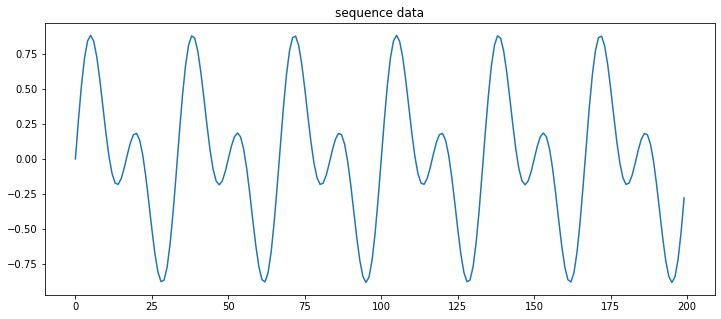

In [102]:
# hyperparameter
seq_len = 50
hidden_dim = 100
input_dim = 1
output_dim = 1
epochs = 6
f = 15
seq_len = 50

# generate dataset
seq_data,X,Y,X_val,Y_val = gen_data(f,seq_len)

# visualize the seq_wave
fig = plt.figure(figsize = (12,5))
plt.plot(seq_data)
plt.title('sequence data')

In [106]:
# build model
#define input sequence data
embedding_vecor_length = 32

# create a sequenctial model
model = tf.keras.models.Sequential()

# transform input sequence into word embedding representation
model.add(keras.layers.embeddings.Embedding(50,embedding_vecor_length,input_length = 50))

# generate a 100 dimension output
model.add(tf.keras.layers.GRU(hidden_dim))

# fully connected layer weight the 100-dimension output to one node for prediction
model.add(Dense(output_dim,activation = 'sigmoid'))

# compile model
model.compile(loss= keras.losses.binary_crossentropy,optimizer = 'adam',metrics = ['accuracy'])

# summary model
print(model.summary())


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 50, 32)            1600      
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               40200     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 41,901
Trainable params: 41,901
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
history = model.fit(X,Y,epochs = 6,validation_data = (X_val,Y_val),batch_size = 64,verbose = True)

Epoch 1/6
3/3 [==============================] - 3s 325ms/step - loss: 0.6946 - accuracy: 0.0000e+00 - val_loss: 0.6475 - val_accuracy: 0.0000e+00
Epoch 2/6
3/3 [==============================] - 0s 95ms/step - loss: 0.6392 - accuracy: 0.0000e+00 - val_loss: 0.5843 - val_accuracy: 0.0000e+00
Epoch 3/6
3/3 [==============================] - 0s 93ms/step - loss: 0.5832 - accuracy: 0.0000e+00 - val_loss: 0.5089 - val_accuracy: 0.0000e+00
Epoch 4/6
3/3 [==============================] - 0s 90ms/step - loss: 0.5117 - accuracy: 0.0000e+00 - val_loss: 0.4080 - val_accuracy: 0.0000e+00
Epoch 5/6
3/3 [==============================] - 0s 104ms/step - loss: 0.4183 - accuracy: 0.0000e+00 - val_loss: 0.2608 - val_accuracy: 0.0000e+00
Epoch 6/6
3/3 [==============================] - 0s 91ms/step - loss: 0.2923 - accuracy: 0.0000e+00 - val_loss: 0.0309 - val_accuracy: 0.0000e+00


### LSTM Keras

In [24]:
import numpy as np
import keras
from keras.datasets import imdb 
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

In [9]:
# fix random seed for reproducibility
np.random.seed(7)

In [10]:
# load dataset but keep the n top words, zero the rest // data preprocessing
top_words = 5000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = top_words)
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (25000,)
y_train: (25000,)
X_test: (25000,)
y_test: (25000,)


In [111]:
print(X_train[0].shape)
print(X_train[0][:20])

(500,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
y_train[0]

1

In [16]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train,maxlen = max_review_length)
X_test = sequence.pad_sequences(X_test,maxlen = max_review_length)

In [19]:
print(X_train.shape)
X_train[0]

(25000, 500)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


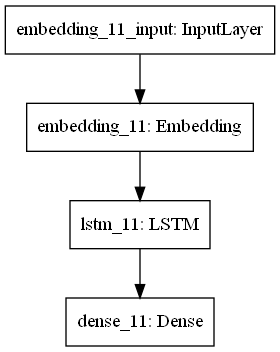

In [35]:
# define word embedding size
embedding_vecor_length = 32

# create a sequential model
model = Sequential()

# transform input sequence into word embedding representation
model.add(Embedding(top_words,embedding_vecor_length,input_length = max_review_length))

# generate a 100-dimension output, can be replaced by GRU or SimpleRNN recurrent cells
model.add(LSTM(100))

# a fully connected layer weight the 100-dimension output to one node for prediction
model.add(Dense(1,activation = 'sigmoid'))

# use binary-crossentropy as the loss function for the classification
model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam',metrics = ['accuracy'])

# summary model
print(model.summary())

# plot the model
plot_model(model)

In [36]:
# train the model
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =3, batch_size = 64,verbose = True)

Epoch 1/3
391/391 [==============================] - 518s 1s/step - loss: 0.4649 - accuracy: 0.7806 - val_loss: 0.3406 - val_accuracy: 0.8624
Epoch 2/3
391/391 [==============================] - 590s 2s/step - loss: 0.3062 - accuracy: 0.8798 - val_loss: 0.3326 - val_accuracy: 0.8640
Epoch 3/3
391/391 [==============================] - 541s 1s/step - loss: 0.3272 - accuracy: 0.8733 - val_loss: 0.3556 - val_accuracy: 0.8537


In [37]:
# Final evaluation of the model
scores =model.evaluate(X_test,y_test)

782/782 [==============================] - 161s 206ms/step - loss: 0.3556 - accuracy: 0.8537


**Note**

![exploding_vanishing](exploding_vanishing.png)

- *Exploding gradients*: if we start almost exactly on the boundary(cliff), tiny changes can make a huge differences

- *Vanishing gradients*: if we start a tracejetory within an attractor (plane,flat surface) small changes in where we start make not much difference to where we end up


Both case hinder the learning process

### References

[coursera](https://www.coursera.org/lecture/nlp-sequence-models/longshort-term-memory-lstm-KXoay)

[Deep Learning 71: Back-propagation in Gated Recurrent Unit (GRU) Architecture](https://www.youtube.com/watch?v=P0W3iHKYOHc)

[GRU and LSTM](http://dprogrammer.org/rnn-lstm-gru)

[GRU keras](https://pythonalgos.com/build-a-gru-rnn-in-keras/)

[LateX math sympol](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)

[RNN-LSTM-in-numpy](https://github.com/CaptainE/RNN-LSTM-in-numpy)

[lstm-gru-scartch](https://github.com/gstechgeek/LSTM_from_scratch)

[lstm-scratch](https://github.com/nicodjimenez/lstm)

[RecurrentNeuralNet](https://github.com/mukul-rathi/deep-learning-tutorials/tree/master/RecurrentNeuralNet)

[lstm_from_scratch](https://github.com/Aidandos/lstm_from_scratch)

[lstm-scratch2](https://github.com/PNilay/LSTM-Network-from-Scratch)

[LSTM tensorflow](https://github.com/mayuri0192/LSTM-Implementation-from-Scratch)

[LSTM Image-Captioning](https://github.com/divyanshj16/Image-Captioning)

[LSTM-Human-Activity-Recognition](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition)

[LSTM-C++](https://github.com/abstractguy/LSTM)

[lstm-models-for-time-series-forecasting](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

[MIT 6.S191 (2021): Recurrent Neural Networks](https://www.youtube.com/watch?v=qjrad0V0uJE&t=3061s)

[Stock Price Prediction Using Python & Machine Learning](https://www.youtube.com/watch?v=QIUxPv5PJOY)

[Python: Real-time Automated Long Short Term Memory (LSTM) Short-term Load Forecasting & Plotting](https://www.youtube.com/watch?v=aQxPRsba23Y)

[LSTM-derivation-bptt](https://www.geeksforgeeks.org/lstm-derivation-of-back-propagation-through-time/)

[uderstand_LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

[cryptoNet](https://github.com/Spartee/LSTM-RNN/blob/master/model.py)

[Eminem lyrics](https://github.com/Modestas96/LSTM_numpy)

[chatbot](https://github.com/adi2381/ai-chatbot)

[chatbot-adv](https://github.com/chaoming0625/NumpyDL)

[Stock-Price-Predictor](https://github.com/Rajat-dhyani/Stock-Price-Predictor)

[](https://github.com/Kulbear/deep-learning-coursera/blob/master/Sequence%20Models/Dinosaurus%20Island%20--%20Character%20level%20language%20model%20final%20-%20v3.ipynb)